## Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

### Importing Required Libraries and Warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',200)

import warnings   
warnings.filterwarnings(action="ignore")

## Application Data

### 1. Loading Data in Notebook and Discovering Data

In [2]:
# Loading application_data into Jupyter NB
app_df = pd.read_csv('application_data.csv')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Checking Shape of app_df
app_df.shape

(307511, 122)

In [4]:
# Checking app_df statistical summary
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
# Checking information of app_df
app_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### 2. Missing and Null Values

Finding NaN values % in app_df.

In [6]:
# Finding null and missing values and assigning it to new varibale.
null_cols = 100*app_df.isnull().mean()[(100*app_df.isnull().mean())>0]
null_cols

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

In [7]:
# Finding length columns which have more than 40% null values
len(null_cols[null_cols>40])

49

As we can see there are 49 columns which have missing values more than 40%. We will drop these columns from our dataframe as these can create problem in data analysis.

#### 2.1 Dropping Null Columns

In [8]:
# Creating list of null columns having more than 40 % null values
drop_cols = list(null_cols[null_cols>40].index)

In [9]:
# dropping columns
app_df.drop(labels = drop_cols, axis=1,inplace=True)

In [10]:
#checking shape of app_df after dropping columns
app_df.shape

(307511, 73)

In [11]:
# Remaining null columns for imputation
null_cols = null_cols[~(null_cols>40)].sort_values()
null_cols

DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
OCCUPATION_TYPE               31.345545
dtype: float64

### 3. Imputing Missing Values

#### 3.1 OCCUPATION_TYPE

As name suggest itself Occupation Type is a categorical column having 31.3% as null values. We are going to impute these null values as new category called 'Unknown' beacuse missing % are on high side and we cannot replace it with any other value.

In [12]:
# Creating new category in OCCUPATION_TYPE
app_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [13]:
# Cross checking null values
app_df['OCCUPATION_TYPE'].isnull().sum()

0

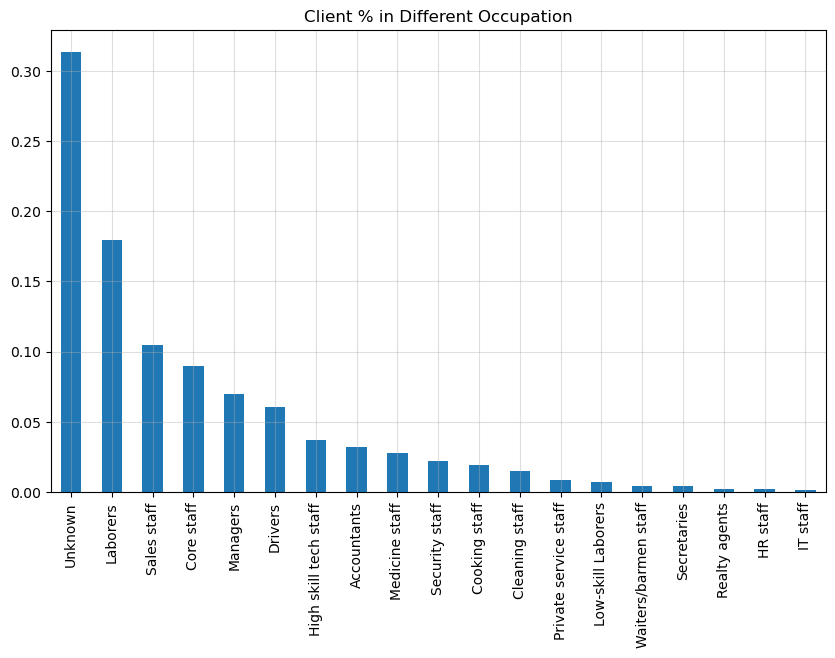

In [14]:
# Bar plot for OCCUPATION_TYPE
app_df['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar(figsize=[10,6])
plt.title('Client % in Different Occupation')
plt.grid(alpha=0.4)
plt.show()

Unknown category has the highest % of employees followed by laborers.

#### 3.2 CNT_FAM_MEMBERS

In [15]:
# CNT_FAM_MEMBERS statistical summary
app_df['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Mean and Median for CNT_FAM_MEMBERS is same. We will impute CNT_FAM_MEMBERS using median.

In [16]:
# Imputing null values and converting to integer
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].fillna(app_df['CNT_FAM_MEMBERS'].median())
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype(int)

In [17]:
# Cross checking null values
app_df['CNT_FAM_MEMBERS'].isnull().sum()

0

#### 3.3 DAYS_LAST_PHONE_CHANGE

In [18]:
#Checking DAYS_LAST_PHONE_CHANGE column
app_df['DAYS_LAST_PHONE_CHANGE'].head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

As we can see these values are in -ve, we first need to fix these invalid values and then take actions for imputation.

In [19]:
# Converting -ve values to +ve values
app_df['DAYS_LAST_PHONE_CHANGE'] = abs(app_df['DAYS_LAST_PHONE_CHANGE'])
app_df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

There is a big difference between mean and median. In this case filling null values with median is best option.

In [20]:
# Imputing null values and converting to integer
app_df['DAYS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'].fillna(app_df['DAYS_LAST_PHONE_CHANGE'].median())
app_df['DAYS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'].astype(int)

In [21]:
# Cross checking null values
app_df['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

#### 3.4 Default and Observation in social cirle

Imputing DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE

In [22]:
#Checking Columns summary
app_df[['DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].describe()

,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.100049,0.143421,1.405292,1.422245
std,0.362291,0.446698,2.379803,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,2.000000
max,24.000000,34.000000,344.000000,348.000000


Difference between 75% and max is huge so median is the rigth option to impute nulls.

In [23]:
# Imputing null values
app_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_df['DEF_60_CNT_SOCIAL_CIRCLE'].median())
app_df['DEF_30_CNT_SOCIAL_CIRCLE'] = app_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_df['DEF_30_CNT_SOCIAL_CIRCLE'].median())
app_df['OBS_60_CNT_SOCIAL_CIRCLE'] = app_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_df['OBS_60_CNT_SOCIAL_CIRCLE'].median())
app_df['OBS_30_CNT_SOCIAL_CIRCLE'] = app_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].median())

In [24]:
# Null values after imputing
app_df[['DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].isnull().sum()

DEF_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
dtype: int64

#### 3.5 AMT_ANNUITY

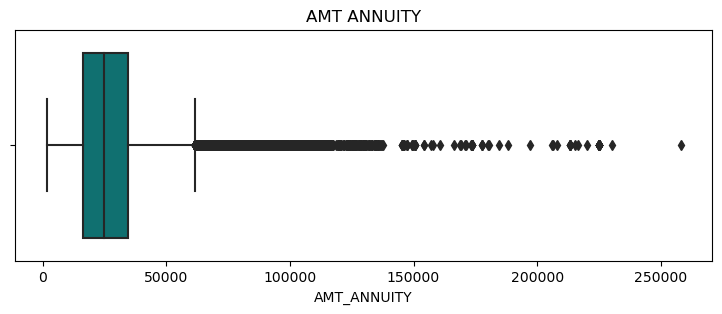

In [25]:
# Boxplot for checking outliers
plt.figure(figsize=[9,3])
sns.boxplot(app_df['AMT_ANNUITY'],color='#008080')
plt.title('AMT ANNUITY')
plt.show()

As we can see there are outliers in this column, we will impute null with median

In [26]:
app_df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [27]:
# Filling null values with median
app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median(),inplace=True)

In [28]:
app_df['AMT_ANNUITY'].isnull().sum()

0

#### 3.6 Price of Goods

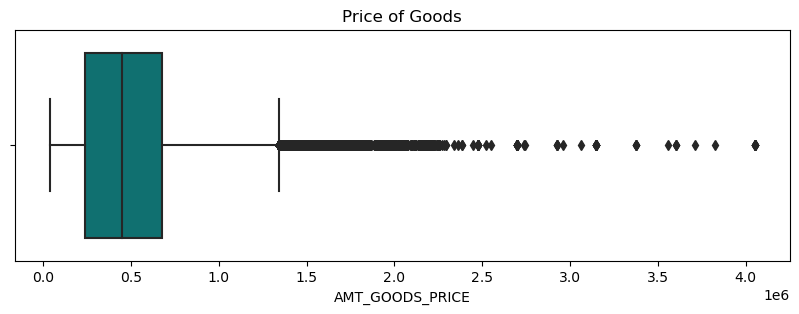

In [29]:
# Boxplot for checking outliers
plt.figure(figsize=[10,3])
sns.boxplot(app_df['AMT_GOODS_PRICE'],color='#008080')
plt.title('Price of Goods')
plt.rcParams['axes.titlesize'] = 20
plt.show()

We can see there are outliers, so we will impute with median

In [30]:
app_df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [31]:
app_df['AMT_GOODS_PRICE'] = app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())

In [32]:
app_df['AMT_GOODS_PRICE'].isnull().sum()

0

#### 3.7 EXT_2, EXT3

Finding correlation betweet EXT_2 EXT3 and Target Variable

In [33]:
# Creating correlation matrix
cor1 = app_df[['EXT_SOURCE_3', 'EXT_SOURCE_2','TARGET']].corr()

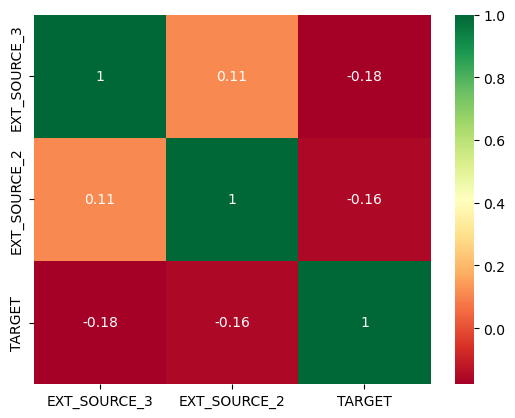

In [34]:
# Plotting heatmap for correlation
sns.heatmap(cor1,annot=True, cmap='RdYlGn')
plt.show()

We can see there is no relation between EXT_SOURCE_2, EXT_SOURCE_3 and TARGET varibale. So we are leaving nulls in these columns.

#### 3.8 AMT_REQ_CREDIT_BUREAU HOUR, DAY, WEEK, MONTH, QTR and YEAR

Checking summary of AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR

In [35]:
app_df[['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.265474,0.006402,0.007000,0.034362,0.267395,1.899974
std,0.794056,0.083849,0.110757,0.204685,0.916002,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,261.000000,4.000000,9.000000,8.000000,27.000000,25.000000


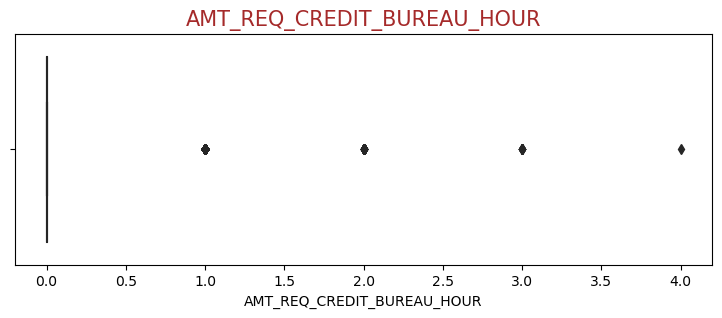

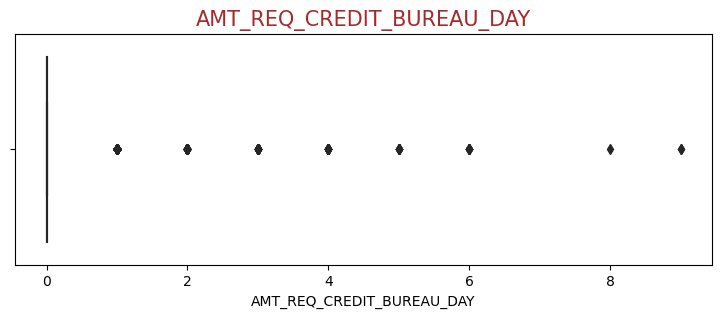

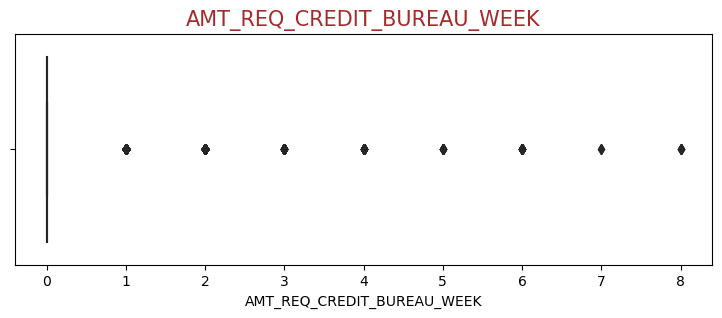

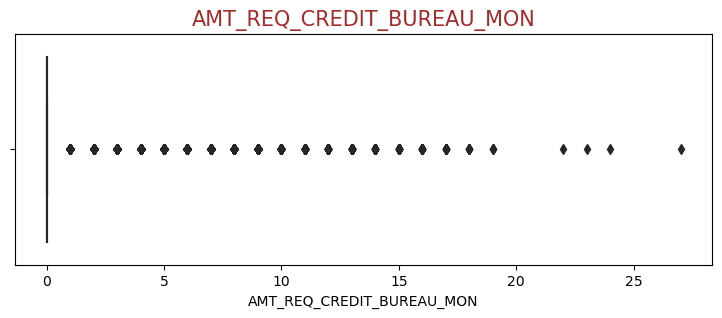

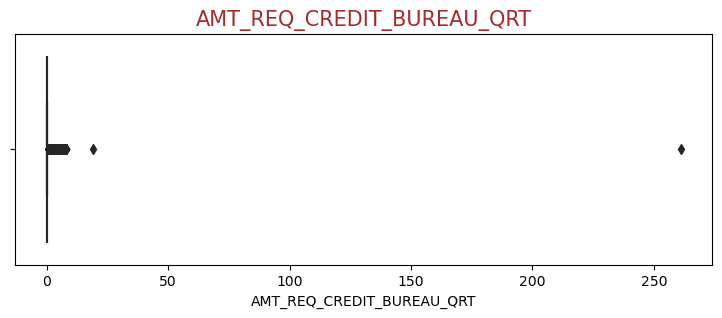

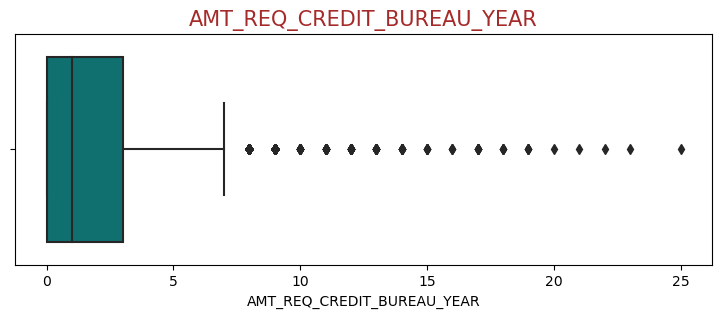

In [36]:
# Using For loop for plotting boxplot
for i in app_df.columns:
    if 'AMT_REQ_CREDIT_BUREAU' in i:
        plt.figure(figsize=[9,3])
        sns.boxplot(app_df[i],color='#008080')
        plt.title(i, fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
        plt.show()

Outliers are presnt in all of the columns, so median is the right way to fill null values.

In [37]:
# For loop for fillinf null values
for i in app_df.columns:
    if 'AMT_REQ_CREDIT_BUREAU' in i:
        app_df[i] = app_df[i].fillna(app_df[i].median())

### 4. Fixing Invalid Values

In [38]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# fixing days columns
days_cols = app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]
days_cols.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


We can see in days columns there are values in negative we need to fix these columns

In [40]:
# Fixing Invalid Values
for i in days_cols:
    app_df[i] = app_df[i].apply(lambda x :int(abs(x)))

In [41]:
days_cols = app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]
days_cols.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648,2120
1,16765,1188,1186,291
2,19046,225,4260,2531
3,19005,3039,9833,2437
4,19932,3038,4311,3458


### 5. Outliers Analysis

In this we will check for outliers in continuous columns and take corrective actions for handilng them.

#### 5.1 AMT_INCOME_TOTAL

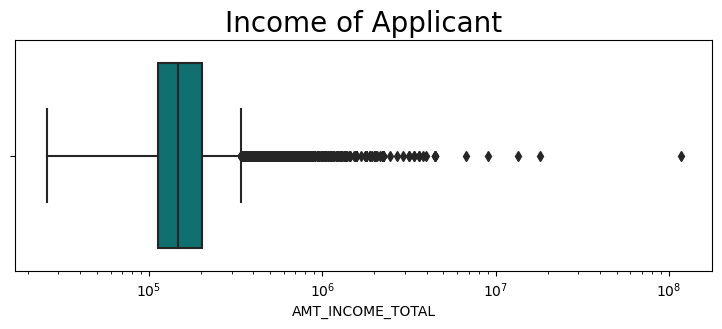

In [42]:
# Plotting Boxplot for outliers
plt.figure(figsize=[9,3])
sns.boxplot(app_df['AMT_INCOME_TOTAL'],color='#008080')
plt.xscale('log')
plt.title('Income of Applicant')
plt.show()

Outliers are present in the income column. Need to check quantiles for better understanding.

In [43]:
app_df['AMT_INCOME_TOTAL'].quantile([0.75,0.90,0.95,0.99,1.0])

0.75       202500.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Difference between 99 percentile and 100 percentile is very huge. We will divide them into different categories.

#### 5.2 AMT_GOODS_PRICE

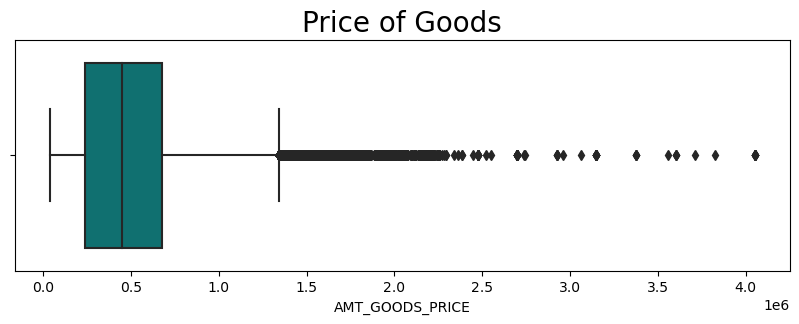

In [44]:
# Plotting Boxplot for outliers
plt.figure(figsize=[10,3])
sns.boxplot(app_df['AMT_GOODS_PRICE'],color='#008080')
plt.title('Price of Goods')
plt.rcParams['axes.titlesize'] = 20
plt.show()

In [45]:
app_df['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [46]:
app_df['AMT_GOODS_PRICE'].quantile([.75,0.85,0.9,0.95,0.99,1.00])

0.75     679500.0
0.85     900000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

Outliers are present in Goods price. Difference between 0.99 and 1.0 is very big.

#### 5.3 AMT_ANNUITY

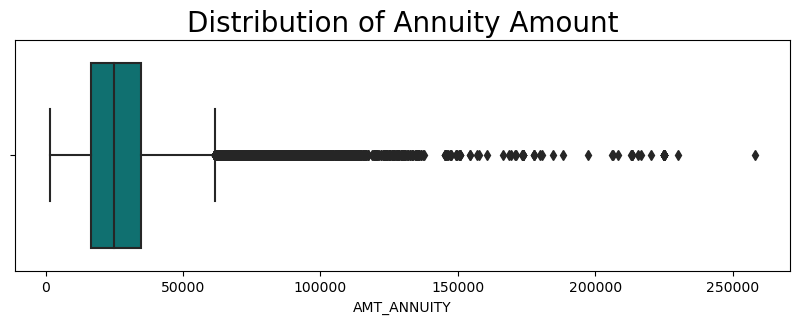

In [47]:
# Plotting Boxplot for outliers
plt.figure(figsize=[10,3])
sns.boxplot(app_df['AMT_ANNUITY'],color='#008080')
plt.title('Distribution of Annuity Amount')
plt.rcParams['axes.titlesize'] = 20
plt.show()

In [48]:
app_df['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [49]:
app_df['AMT_ANNUITY'].quantile([.75,0.85,0.9,0.95,0.99,1.00])

0.75     34596.0
0.85     40806.0
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

Outliers are presnt in AMT_ANNUITY.

#### 5.4 DAYS_EMPLOYED

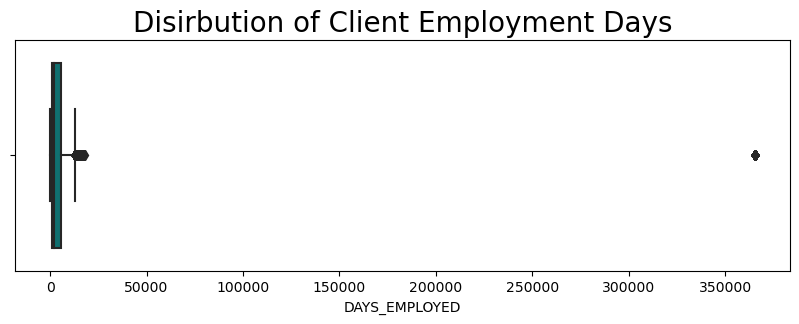

In [50]:
# Plotting Boxplot for outliers
plt.figure(figsize=[10,3])
sns.boxplot(app_df['DAYS_EMPLOYED'],color='#008080')
plt.title('Disirbution of Client Employment Days')
plt.rcParams['axes.titlesize'] = 20
plt.show()

In [51]:
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [52]:
app_df['DAYS_EMPLOYED'].quantile([.81,0.82,0.9,0.95,0.99])

0.81     10913.1
0.82    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

Outliers are present in DAYS_EMPLOYED and it seems like a invalid value. For this binning into new category is best option.

#### 5.5 AMT_CREDIT

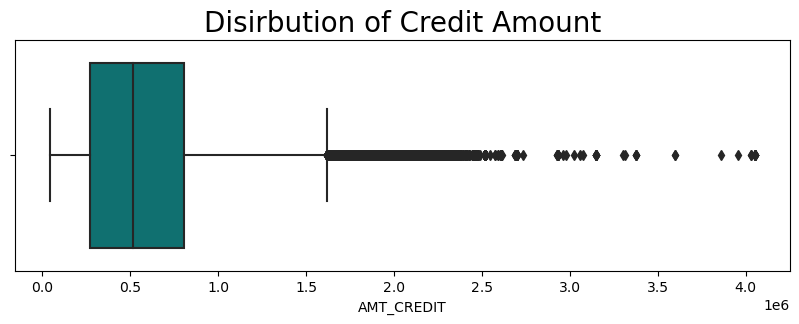

In [53]:
# Plotting Boxplot for outliers
plt.figure(figsize=[10,3])
sns.boxplot(app_df['AMT_CREDIT'],color='#008080')
plt.title('Disirbution of Credit Amount')
plt.rcParams['axes.titlesize'] = 20
plt.show()

In [54]:
app_df['AMT_CREDIT'].quantile([.75,0.85,0.9,0.97,0.99,1.00])

0.75     808650.0
0.85    1024740.0
0.90    1133748.0
0.97    1546020.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

Outliers are available in Credit amount.

### 6. Binning

In outliers analysis we have seen outliers are present in different columns. To analyse these columns better we will divide values into different range.

#### 6.1 DAYS_BIRTH

In [55]:
# Converting birth days to birth years
app_df['DAYS_BIRTH'] = app_df['DAYS_BIRTH'].apply(lambda x : int(x/365))

In [56]:
# Creating AGE_GROUP variable
bins = [0,30,40,50,60,100]
label = ['<30','30-40','40-50','50-60','60+']
app_df['AGE_GROUP'] = pd.cut(app_df['DAYS_BIRTH'], bins = bins, labels = label)
app_df[['DAYS_BIRTH', 'AGE_GROUP']].head()

,DAYS_BIRTH,AGE_GROUP
0,25,<30
1,45,40-50
2,52,50-60
3,52,50-60
4,54,50-60


#### 6.2 DAYS_EMPLOYED

In [57]:
# Converting employed days to employed years
app_df['DAYS_EMPLOYED'] = app_df['DAYS_EMPLOYED']/365
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [58]:
app_df['DAYS_EMPLOYED'].quantile([.81,0.82,0.9,0.95,0.99])

0.81      29.898904
0.82    1000.665753
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

We can there is appx 18% data have invalid values in DAYS_EMPLOYED column. We will binn this data into new category as 'Unknown'.

In [59]:
bins = [-0.1,5,10,15,20,25,30,50,1100]
label = ['0-5','5-10','10-15','15-20','20-25','25-30','30+','Unknown']
app_df['EMPLOYMENT_GROUP'] = pd.cut(app_df['DAYS_EMPLOYED'], bins = bins, labels = label)

In [60]:
# Value counts EMPLOYMENT_GROUP
app_df['EMPLOYMENT_GROUP'].value_counts()

0-5        136311
5-10        64872
Unknown     55374
10-15       27549
15-20       10849
20-25        6243
25-30        3308
30+          3005
Name: EMPLOYMENT_GROUP, dtype: int64

#### 6.3 AMT_CREDIT

In [61]:
# Checking quantile of AMT_CREDIT
app_df['AMT_CREDIT'].quantile([0.25,0.5,.75,0.85,0.95,0.99,1.00])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.85    1024740.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [62]:
# Creating CREDIT_SLABS variable
bins = [0,250000,500000,750000,1000000,1250000,100000000]
label = ['0-2.5L','2.5L-5L','5L-7.5L','7.5L-10L','10L-12.5L','12.5L+']
app_df['CREDIT_SLABS'] = pd.cut(app_df['AMT_CREDIT'], bins = bins, labels = label)

In [63]:
app_df['CREDIT_SLABS'].value_counts()

2.5L-5L      90135
5L-7.5L      65094
0-2.5L       59198
7.5L-10L     43099
10L-12.5L    25075
12.5L+       24910
Name: CREDIT_SLABS, dtype: int64

#### 6.4 AMT_INCOME_TOTAL

In [64]:
# Checking quantile of AMT_INCOME
app_df['AMT_INCOME_TOTAL'].quantile([0.25,0.5,.75,0.85,0.95,0.99,1.00])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.85       234000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

We can the difference between 0.99 and 1.0 quantile is very large. We will divide income into 3 categories 'Low', 'Mediuam' and 'High'.

In [65]:
bins = [0,150000,350000,10000000000]
label = ['Low', 'Medium', 'High']
app_df['INCOME_RANGE'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins = bins, labels = label)

In [66]:
app_df['INCOME_RANGE'].value_counts()

Low       155289
Medium    138357
High       13865
Name: INCOME_RANGE, dtype: int64

#### 6.5 AMT_GOODS_PRICE

In [67]:
# Checking quantile of AMT_GOODS_PRICE
app_df['AMT_GOODS_PRICE'].quantile([0.25,0.5,.75,0.85,0.95,0.99,1.00])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.85     900000.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [68]:
# Creating GOODS_PRICE_RANGE variable
bins = [0,200000,400000,600000,1000000,1200000,100000000]
label = ['0-2L','2L-4L','4L-6L','6L-10L','10L-12L','12L+']
app_df['GOODS_PRICE_RANGE'] = pd.cut(app_df['AMT_GOODS_PRICE'], bins = bins, labels = label)

In [69]:
app_df['GOODS_PRICE_RANGE'].value_counts()

2L-4L      83980
6L-10L     77379
4L-6L      70368
0-2L       41665
12L+       17602
10L-12L    16517
Name: GOODS_PRICE_RANGE, dtype: int64

### 7. Univariate Analysis

#### 7.1 Imbalance Percentage

In [70]:
data_imbal = 100*app_df['TARGET'].value_counts(normalize=True)
data_imbal

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

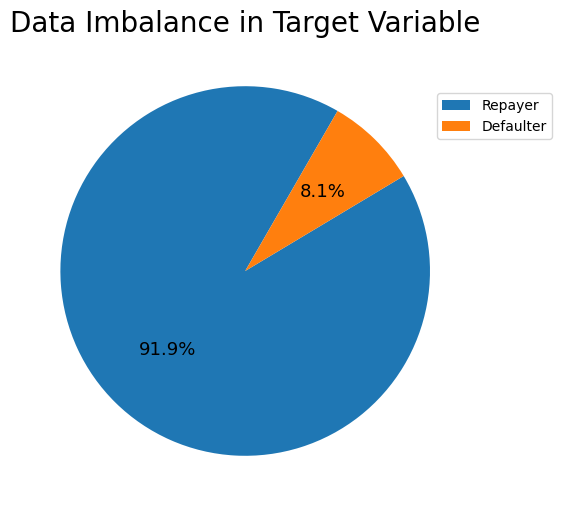

In [71]:
# Pie chart of Data imbalance visualisation
plt.figure(figsize=[6,6])
plt.pie(app_df['TARGET'].value_counts(normalize=True),textprops={'fontsize': 13, 'fontweight' : 20, 'color' : 'Black'}, startangle=60, autopct='%1.1f%%')
plt.title('Data Imbalance in Target Variable')
plt.legend(['Repayer','Defaulter'],bbox_to_anchor=(0.9,0.9))
plt.show()

Here we can see repayer's percentage is higher than defaulter's percentage. 91.9% people pay there loan on time while 8.1% people face difficulties in making loan payments on time.

#### 7.2 Analysis of Occupation Types

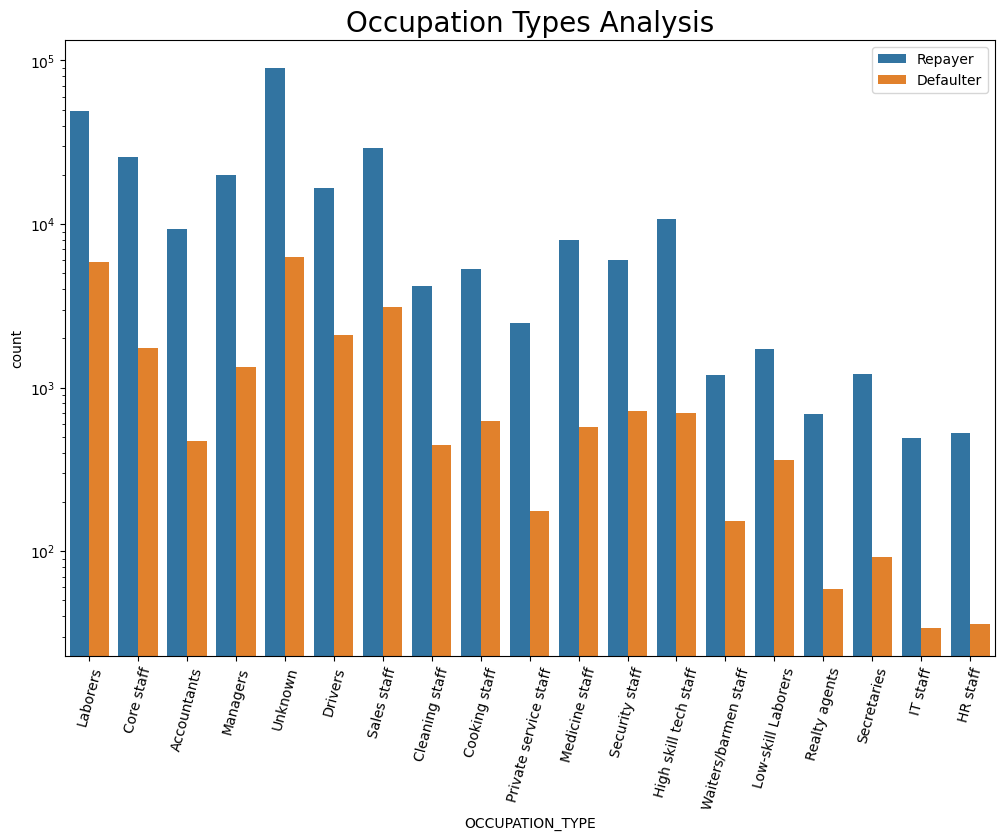

In [72]:
# Count plot for analysing TARGET in different occupations
plt.figure(figsize=[12,8])
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data= app_df)
plt.title('Occupation Types Analysis')
plt.legend(['Repayer','Defaulter'])
plt.yscale('log')
plt.xticks(rotation = 75)
plt.show()

##### Result - Low-skill laborers, Drivers and laborers categories have the high % of defaulters. IT staff, HR staff, Private Service staff and Accountant categories have low default percentage. Bank should focus more on these categories.

#### 7.3 Analysis of Age Group

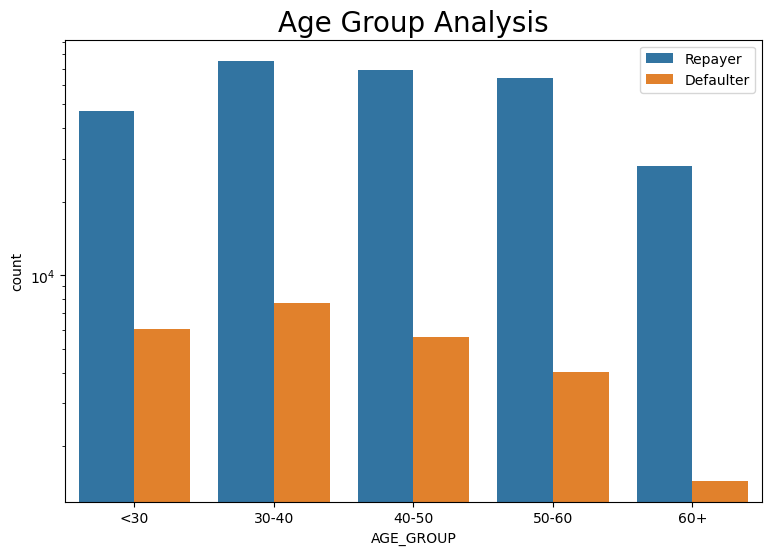

In [73]:
# Count plot for analysing TARGET in different AGE_GROUP
plt.figure(figsize=[9,6])
sns.countplot(x = app_df['AGE_GROUP'], hue=app_df['TARGET'])
plt.title('Age Group Analysis')
plt.yscale('log')
plt.legend(['Repayer','Defaulter'])
plt.show()

##### Result - People with age 50 years and above are likely to repay loan than younger people.

#### 7.4 Education Background Analysis

In [74]:
# Creating pivot table of education
edu1 = pd.pivot_table(data = app_df, columns='TARGET', index = 'NAME_EDUCATION_TYPE', values = 'SK_ID_CURR', aggfunc=lambda x: x.count())
edu1 = edu1[[0,1]].apply(lambda x :x/x.sum(),axis = 1)
edu1

TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,0.981707,0.018293
Higher education,0.946449,0.053551
Incomplete higher,0.915150,0.084850
Lower secondary,0.890723,0.109277
Secondary / secondary special,0.910601,0.089399


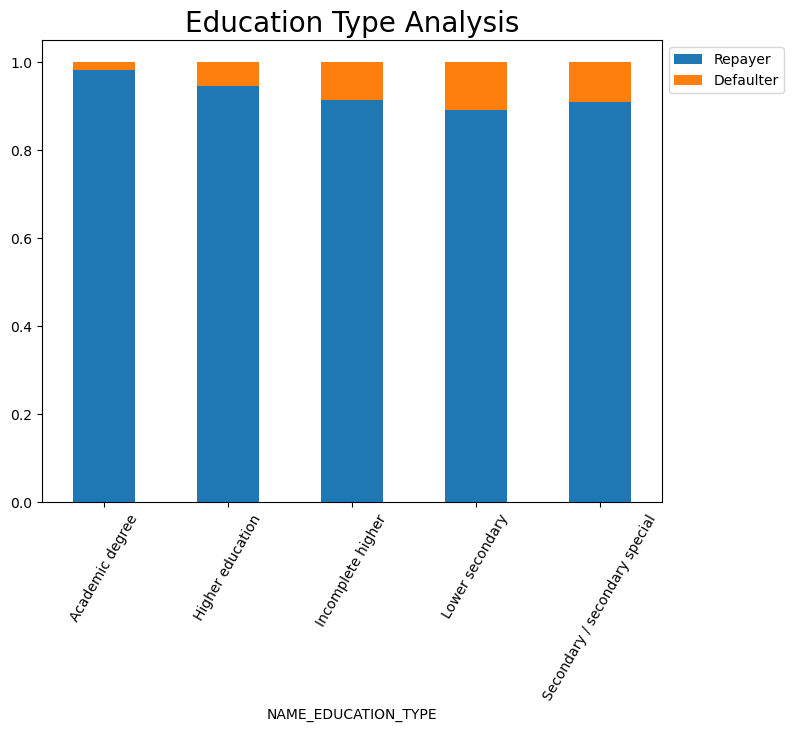

In [75]:
# Creating Stacked Bar plot
edu1.plot(kind = 'bar', stacked=True,figsize=[8,6])
plt.legend(['Repayer','Defaulter'],bbox_to_anchor=(1.0,1.0))
plt.title('Education Type Analysis')
plt.xticks(rotation=60)
plt.show()

##### Result - People with higher education repay their loan on time than people with lower education.

#### 7.5 Work Experience Analysis

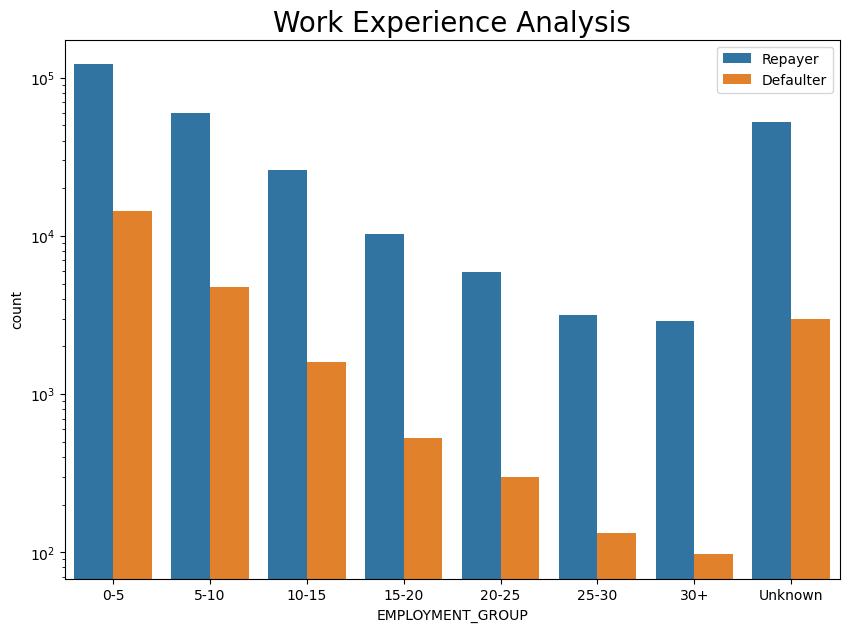

In [76]:
# Count plot of EMPLOYMENT_GROUP
plt.figure(figsize=[10,7])
sns.countplot(data = app_df, x='EMPLOYMENT_GROUP', hue='TARGET' )
plt.title('Work Experience Analysis')
plt.legend(['Repayer','Defaulter'])
plt.yscale('log')
plt.show()

##### Result - Peolple with more professional experience are paying loan on time. People with work experience 0-5 years have high chances of making payment defaults.

#### 7.6 Organization Type Analysis

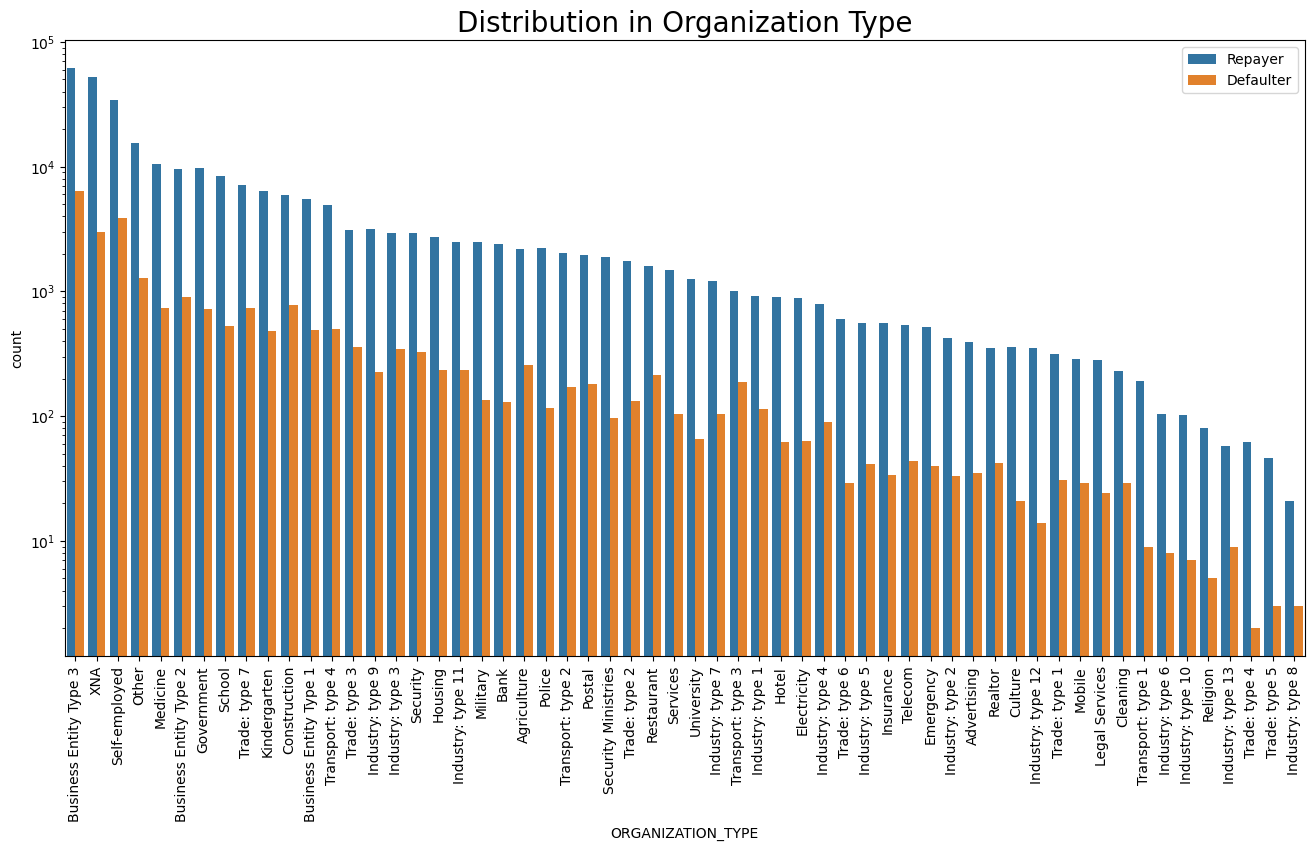

In [77]:
# Count plot of ORGANIZATION_TYPE
order = app_df['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=[16,8])
sns.countplot(x='ORGANIZATION_TYPE', hue='TARGET', data= app_df, order=order)
plt.legend(['Repayer','Defaulter'])
plt.title('Distribution in Organization Type')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

##### Result - As seen people from Military, Bank, University, Police, Medicine, School, Industry type 9, Trade type 6, Industry type 12, Security Minister, Insurance, Culture, Transport type 1, Religion, Trade type 4  and Trade type 5 have the low percentage of defaulters. Bank should focus on these organization more.

### 8. Segmented Univariate Analysis

Creating 2 dataframes. First of people with no payment issue and second of people with payment issue.

In [78]:
# Creating dataframe of people with no payment issue
repayer = app_df[app_df['TARGET'] == 0]

In [79]:
repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYMENT_GROUP,CREDIT_SLABS,INCOME_RANGE,GOODS_PRICE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,12.5L+,Medium,10L-12L
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0.616438,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,0-5,0-2.5L,Low,0-2L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8.326027,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,50-60,5-10,2.5L-5L,Low,2L-4L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8.323288,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,5-10,5L-7.5L,Low,4L-6L
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,4.350685,4970,477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,0-5,2.5L-5L,Low,4L-6L


In [80]:
# Creating dataframe of people with payment issue
defaulter = app_df[app_df['TARGET'] == 1]

In [81]:
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYMENT_GROUP,CREDIT_SLABS,INCOME_RANGE,GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1.745205,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<30,0-5,2.5L-5L,Medium,2L-4L
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,7.200000,6573,1827,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,50-60,5-10,7.5L-10L,Low,6L-10L
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,3.457534,1182,1029,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,40-50,0-5,10L-12.5L,Medium,6L-10L
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,9.854795,45,4409,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,30-40,5-10,2.5L-5L,Low,2L-4L
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,1000.665753,5391,4199,1,0,0,1,0,0,Unknown,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Unknown,2.5L-5L,Low,2L-4L


#### 8.1 NAME_FAMILY_STATUS

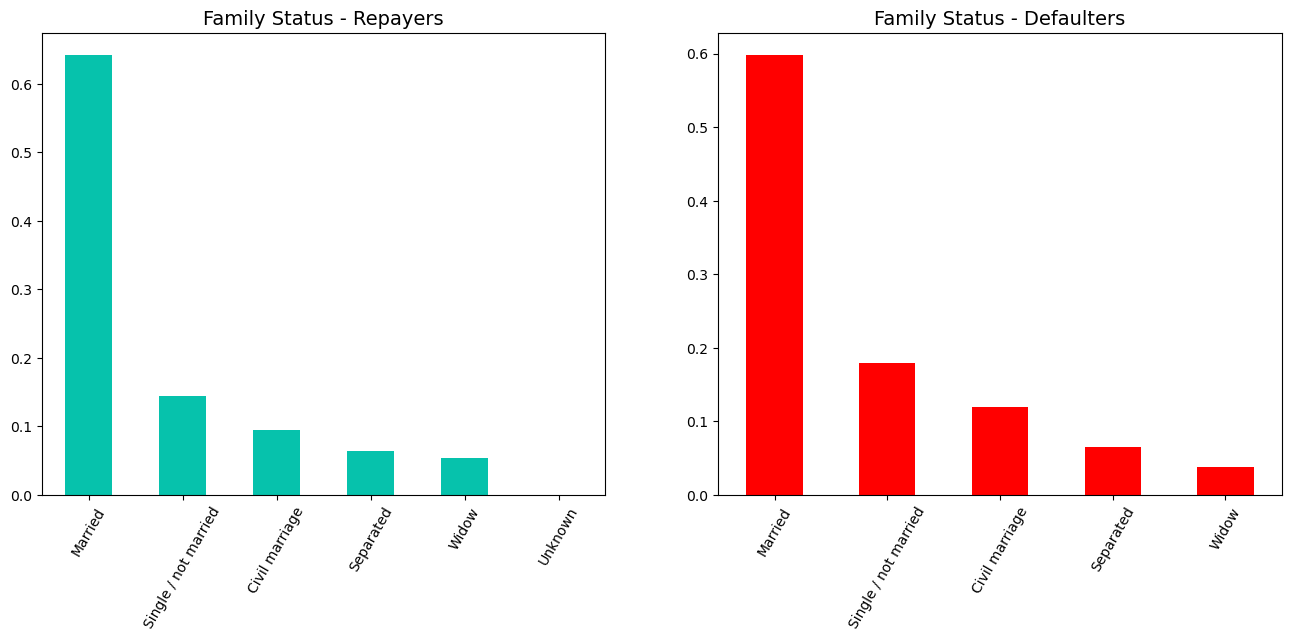

In [82]:
plt.figure(figsize=[16,6])

# creating subplot-Repayer
plt.subplot(1,2,1)
repayer['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar(color = '#06C2AC')
plt.title('Family Status - Repayers', fontdict={'fontsize': 14})
plt.xticks(rotation = 60)

# creating subplot-Defaulter
plt.subplot(1,2,2)
defaulter['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar(color = 'red')
plt.title('Family Status - Defaulters', fontdict={'fontsize': 14})
plt.xticks(rotation = 60)

plt.show()

##### Result - We can see here Married people have the highest percentage in both repayers and defaulters. But Single or not married person have the more default percentage than repaying percentage. Bank should be careful while giving loans to this category.

#### 8.2 AMT_INCOME(INCOME_RANGE)

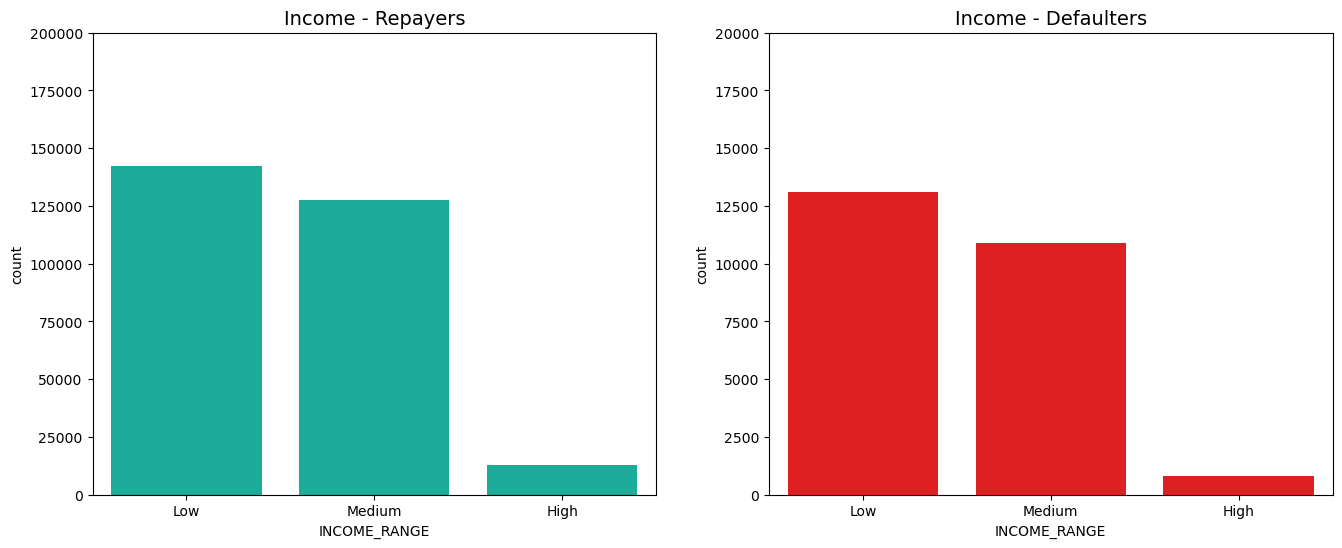

In [83]:
plt.figure(figsize=[16,6])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.countplot(repayer['INCOME_RANGE'], color = '#06C2AC')
plt.title('Income - Repayers', fontdict={'fontsize': 14})
plt.ylim(0,200000)

# creating subplot-Defaulter
plt.subplot(1,2,2)
sns.countplot(defaulter['INCOME_RANGE'],color = 'red' )
plt.title('Income - Defaulters', fontdict={'fontsize': 14})
plt.ylim(0,20000)


plt.show()

##### Result - Majority of the people have income between 1 lacs to 3 lacs. People with low income has high chances of defaulting the loan.

#### 8.3 AMT_ANNUITY

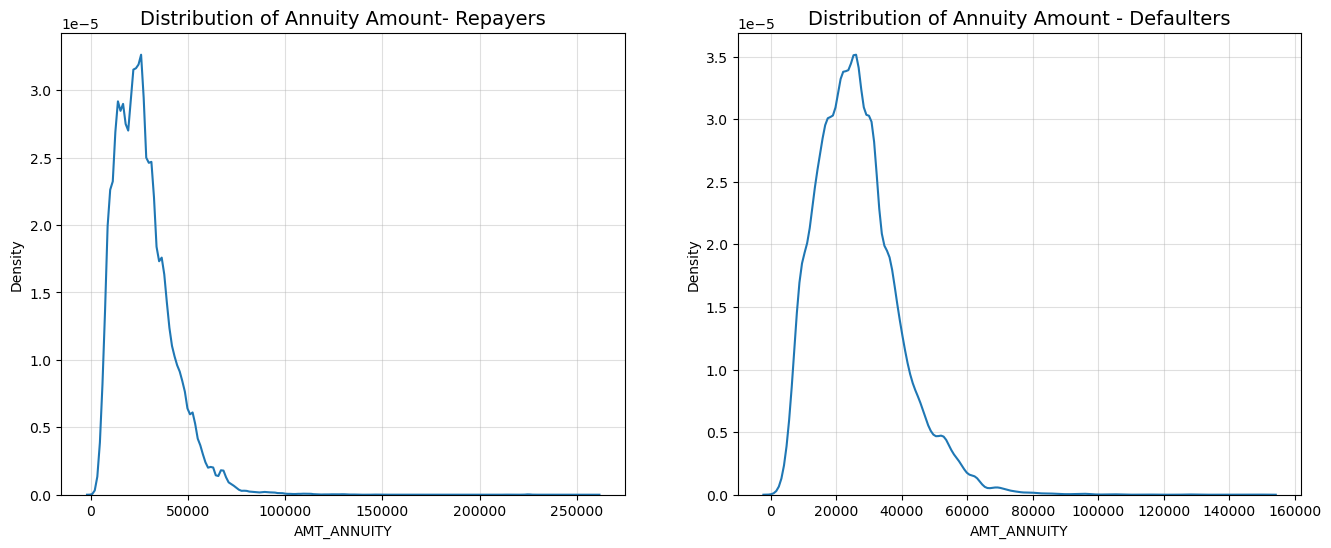

In [84]:
plt.figure(figsize=[16,6])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.distplot(repayer['AMT_ANNUITY'], kde=True, hist=False)
plt.title('Distribution of Annuity Amount- Repayers', fontdict={'fontsize': 14})
plt.grid(alpha=0.4)

# creating subplot-Defaulter
plt.subplot(1,2,2)
sns.distplot(defaulter['AMT_ANNUITY'], kde=True, hist=False)
plt.title('Distribution of Annuity Amount - Defaulters', fontdict={'fontsize': 14})
plt.grid(alpha=0.4)

plt.show()

##### Result - Mostly repayers paying annuity amount upto Rs 50000. Mostly defaulters paying annuity amount approx Rs 30000. There are more defaulters in low credit category. Bank needs to be more careful while giving loans in credit range.

#### 8.4 FLAG_OWN_CAR

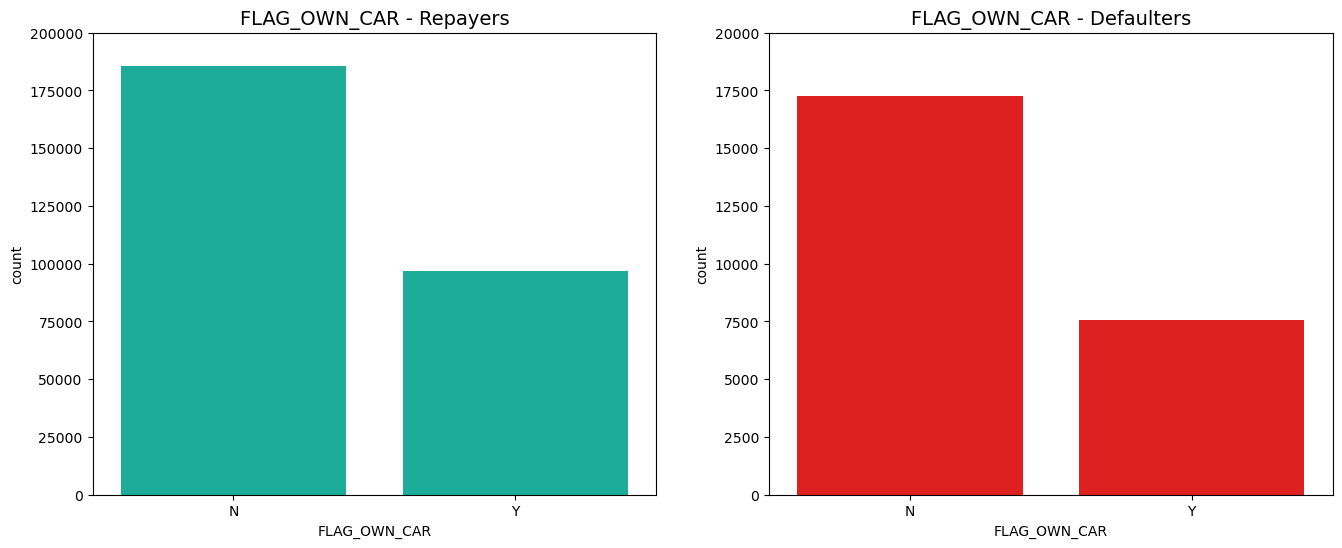

In [85]:
plt.figure(figsize=[16,6])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.countplot(repayer['FLAG_OWN_CAR'], color = '#06C2AC')
plt.title('FLAG_OWN_CAR - Repayers', fontdict={'fontsize': 14})
plt.ylim(0,200000)

# creating subplot-Defaulter
plt.subplot(1,2,2)
sns.countplot(defaulter['FLAG_OWN_CAR'],color = 'red' )
plt.title('FLAG_OWN_CAR - Defaulters', fontdict={'fontsize': 14})
plt.ylim(0,20000)


plt.show()

##### Result - Having car or not having does not have impact. We cannot draw any result from this.

### 9. Bivariate Analysis

#### 9.1 Numerical vs Numerical Analysis

#### 9.1.1 Goods Price vs Credit Amount

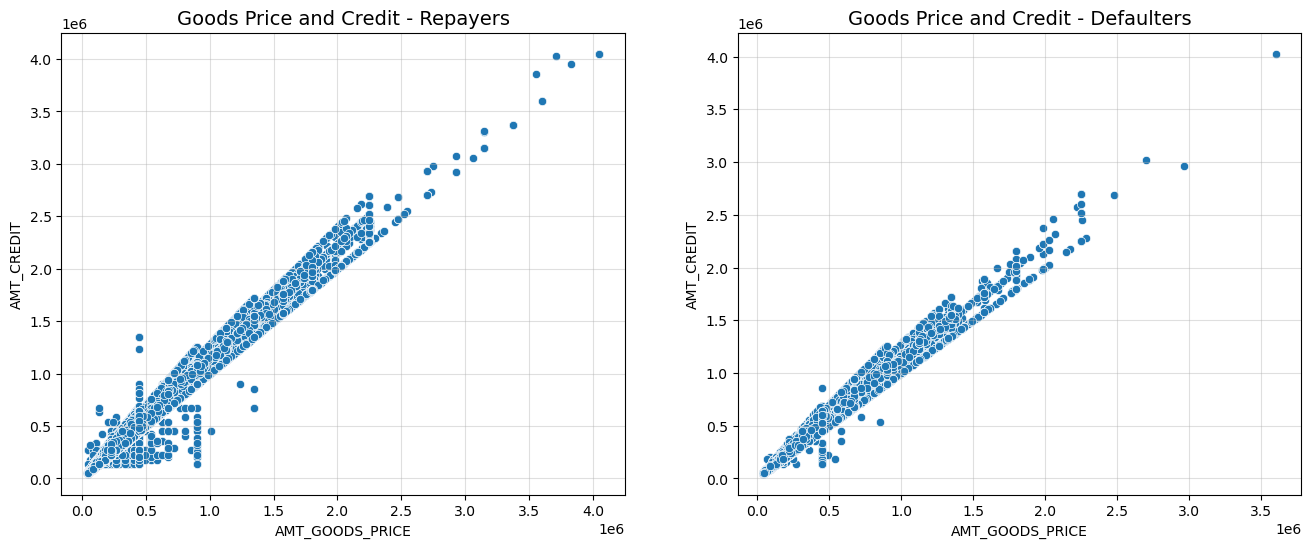

In [86]:
plt.figure(figsize=[16,6])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.scatterplot(data = repayer, x = 'AMT_GOODS_PRICE', y = 'AMT_CREDIT')
plt.title('Goods Price and Credit - Repayers', fontdict={'fontsize': 14})
plt.grid(alpha=0.4)

# creating subplot-Defaulter
plt.subplot(1,2,2)
sns.scatterplot(data = defaulter, x = 'AMT_GOODS_PRICE', y = 'AMT_CREDIT')
plt.title('Goods Price and Credit - Defaulters', fontdict={'fontsize': 14})
plt.grid(alpha=0.4)

plt.show()

##### Result - Repayers have high chances of getting high credit for expensive goods. 

#### 9.1.2 Annuity amount, Goods Price and Income Range

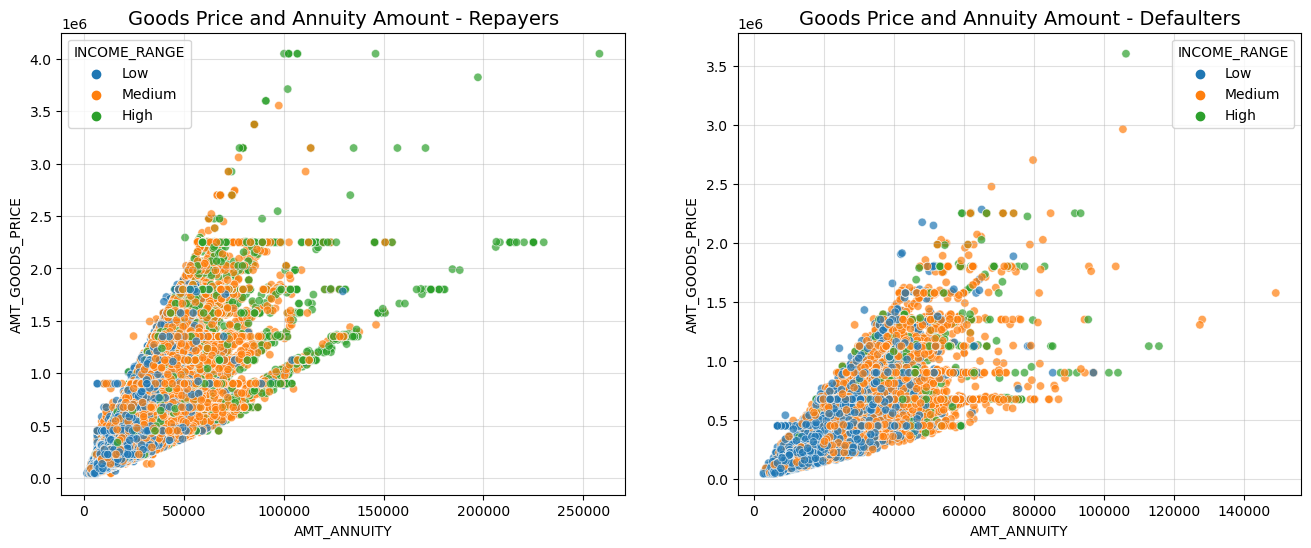

In [87]:
plt.figure(figsize=[16,6])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.scatterplot(data = repayer, x = 'AMT_ANNUITY', y = 'AMT_GOODS_PRICE', hue = 'INCOME_RANGE', alpha = 0.7)
plt.title('Goods Price and Annuity Amount - Repayers', fontdict={'fontsize': 14})
plt.grid(alpha=0.4)

# creating subplot-Defaulter
plt.subplot(1,2,2)
sns.scatterplot(data = defaulter, x = 'AMT_ANNUITY', y = 'AMT_GOODS_PRICE', hue = 'INCOME_RANGE', alpha = 0.7)
plt.title('Goods Price and Annuity Amount - Defaulters', fontdict={'fontsize': 14})
plt.grid(alpha=0.4)

plt.show()

##### Result - Goods price and annuity amount is more in all income category for repayers and for defaulters annuity amount and goods price is low.

#### 9.2 Categorical vs Categorical Analysis

#### 9.2.1 Credit Amount vs Income Range

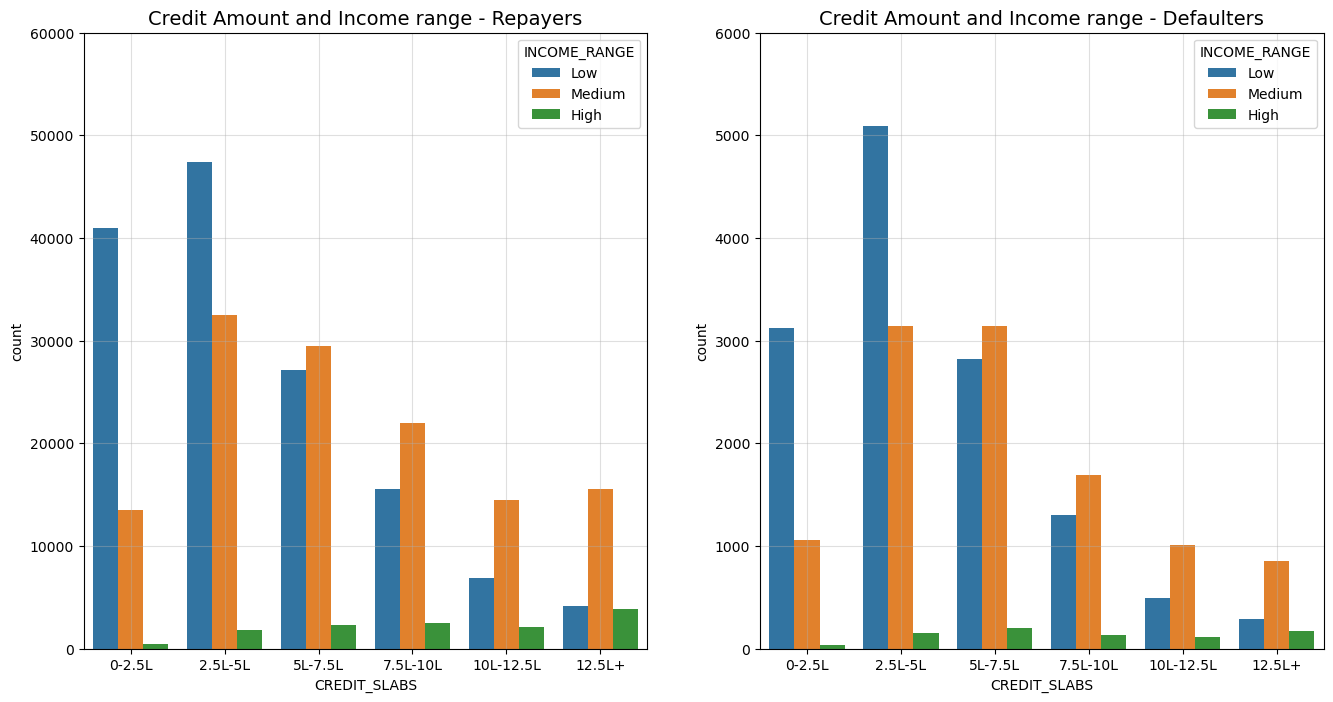

In [88]:
plt.figure(figsize=[16,8])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.countplot(data = repayer, x = 'CREDIT_SLABS', hue = 'INCOME_RANGE')
plt.title('Credit Amount and Income range - Repayers', fontdict={'fontsize': 14})
plt.ylim(0,60000)
plt.grid(alpha=0.4)

# creating subplot-Defaulter
plt.subplot(1,2,2)
sns.countplot(data = defaulter, x = 'CREDIT_SLABS', hue = 'INCOME_RANGE')
plt.title('Credit Amount and Income range - Defaulters', fontdict={'fontsize': 14})
plt.ylim(0,6000)
plt.grid(alpha=0.4)

plt.show()

##### Result - Low-income people are more likely to default on loans. While in higher credit maount people with high and medium income are paying loan on time.

#### 9.2.2 Goods Price and Income Range

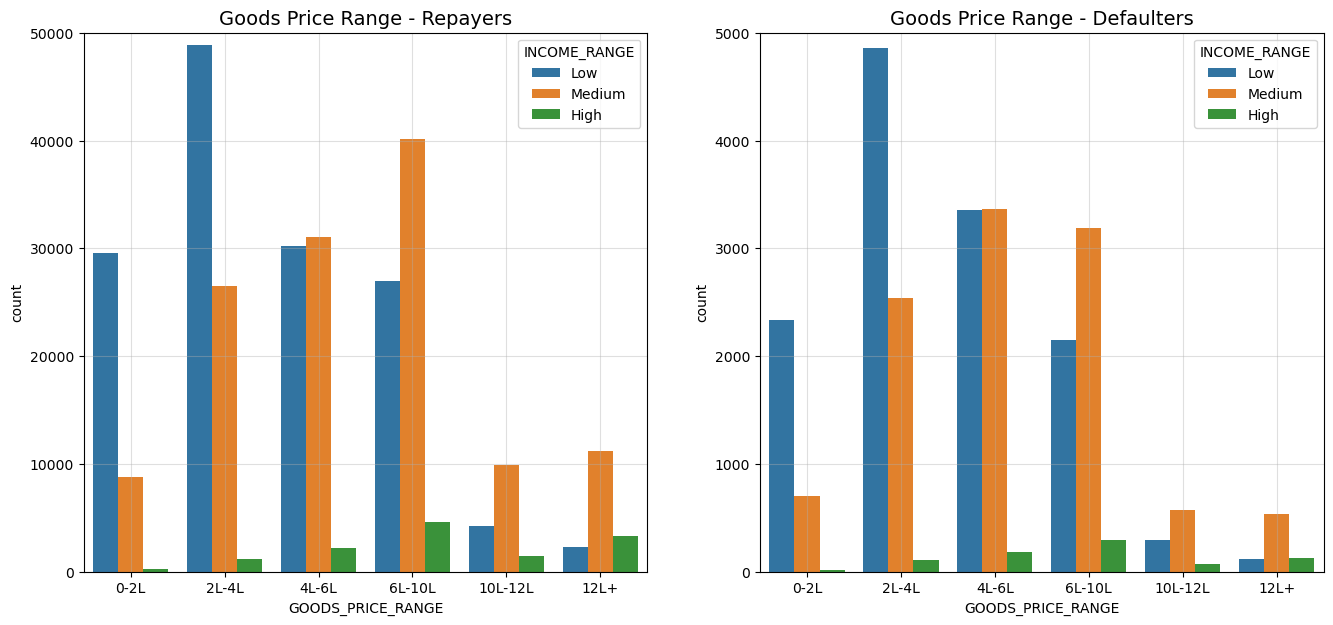

In [89]:
plt.figure(figsize=[16,7])

# creating subplot-Repayer
plt.subplot(1,2,1)
sns.countplot(repayer['GOODS_PRICE_RANGE'], hue = repayer['INCOME_RANGE'])
plt.title('Goods Price Range - Repayers', fontdict={'fontsize': 14})
plt.ylim(0,50000)
plt.grid(alpha=0.4)

#creating subplot-Defaulter
plt.subplot(1,2,2)
sns.countplot(defaulter['GOODS_PRICE_RANGE'], hue = defaulter['INCOME_RANGE'] )
plt.title('Goods Price Range - Defaulters', fontdict={'fontsize': 14})
plt.ylim(0,5000)
plt.grid(alpha=0.4)

plt.show()

##### Result - People with high and medium income buying expensive goods paying loan on time. Goods price 4 lacs to 6 lacs have high % of defaulters in all income category.

### 10. Correlations

#### 10.1 Top 10 Correlation of Defaulters

In [90]:
cor1 = defaulter[['AMT_INCOME_TOTAL','AMT_CREDIT','FLAG_EMP_PHONE','AMT_ANNUITY','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','CNT_CHILDREN','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [91]:
cor1 = cor1.corr()

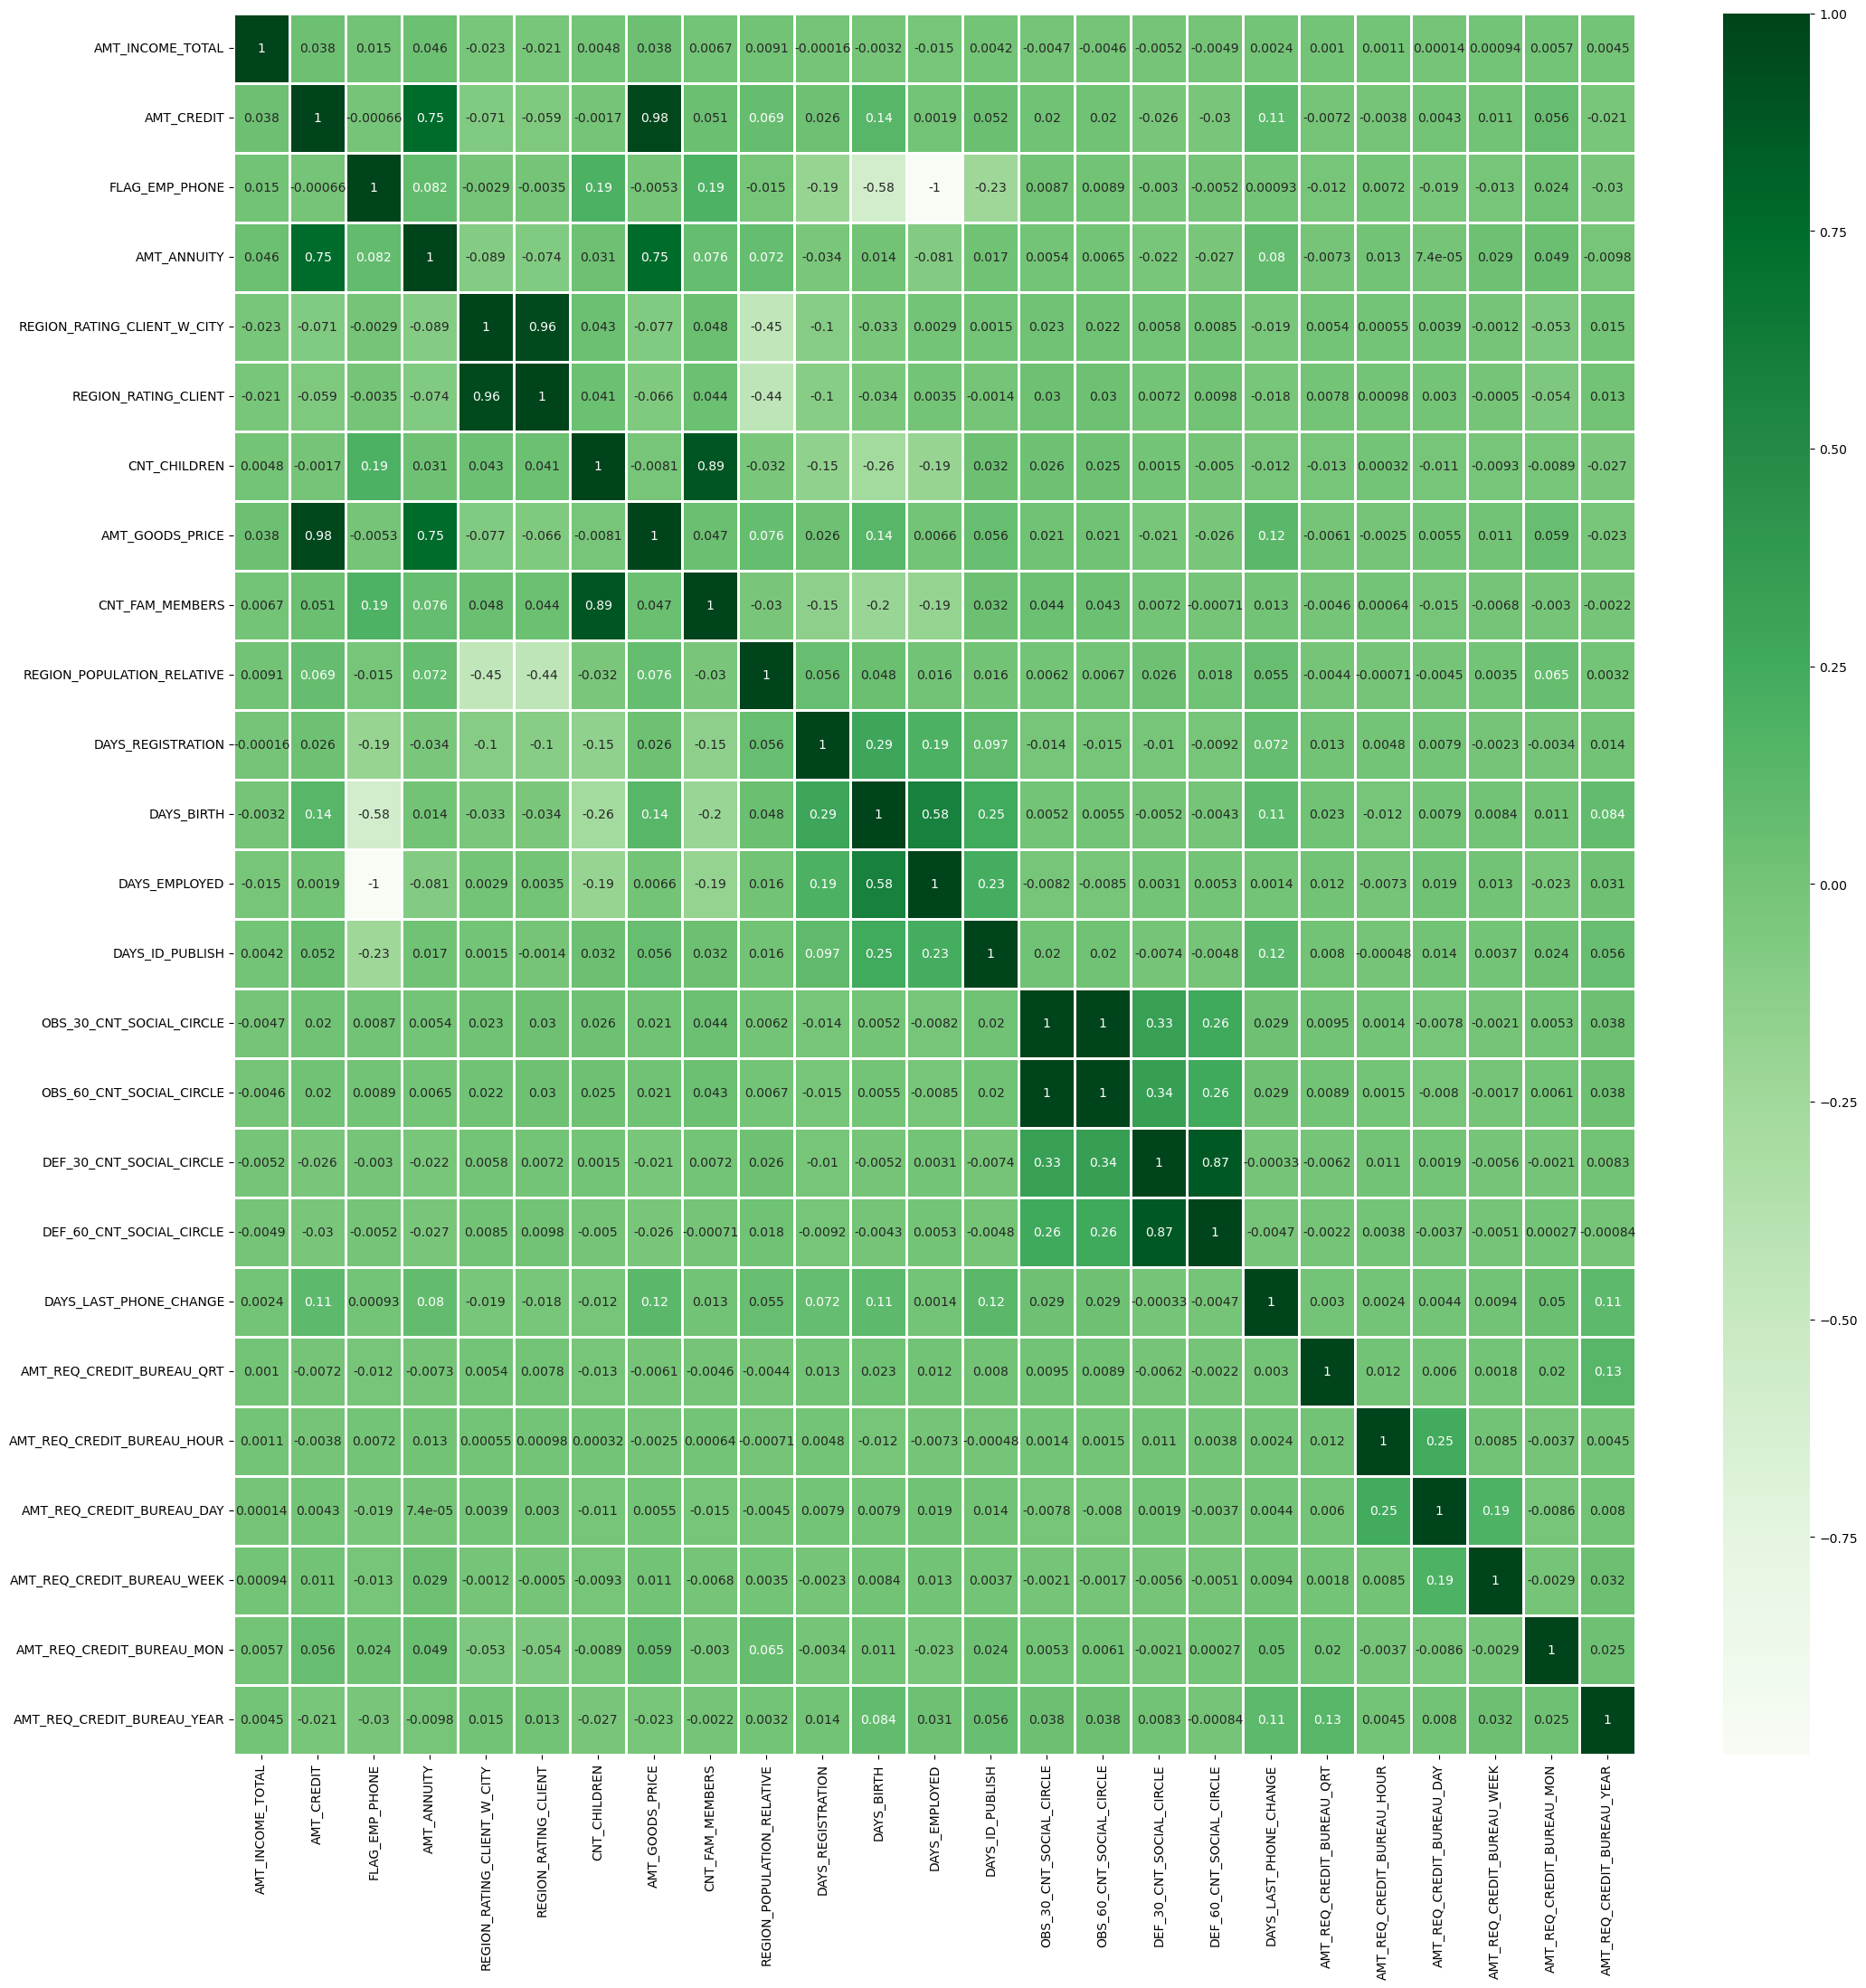

In [92]:
# correlation heatmap
plt.figure(figsize=[25,25])
sns.heatmap(cor1, annot=True, cmap='Greens',linewidths=1)
plt.show()

In [93]:
# Creatind dataframe from correlation matrix and finding top 10 correlation
cor1 = cor1.where(np.triu(np.ones(cor1.shape), k=1).astype(np.bool))
def_cor = cor1.unstack().reset_index()
def_cor.columns = ['Variable-1','Variable-2', 'Correlation']
def_cor.dropna(axis = 0, how = 'any', inplace=True)
def_cor['Correlation'] = round(def_cor['Correlation'], 2)
def_cor['Correlation'] = def_cor['Correlation'].apply(lambda x: abs(x))
def_cor.sort_values(by = 'Correlation', ascending = False, inplace= True)
def_cor.head(10)

,Variable-1,Variable-2,Correlation
302,DAYS_EMPLOYED,FLAG_EMP_PHONE,1.00
389,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
176,AMT_GOODS_PRICE,AMT_CREDIT,0.98
129,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.96
206,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
441,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
178,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
76,AMT_ANNUITY,AMT_CREDIT,0.75
311,DAYS_EMPLOYED,DAYS_BIRTH,0.58
277,DAYS_BIRTH,FLAG_EMP_PHONE,0.58


##### Result - Days Employed and Emp Phone are highly correlated follwed by Obs count social circle 30 and 60.

#### 10.2 Top 10 Correlation of Repayers

In [94]:
cor0 = repayer[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','FLAG_EMP_PHONE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','CNT_CHILDREN','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [95]:
cor0 = cor0.corr()

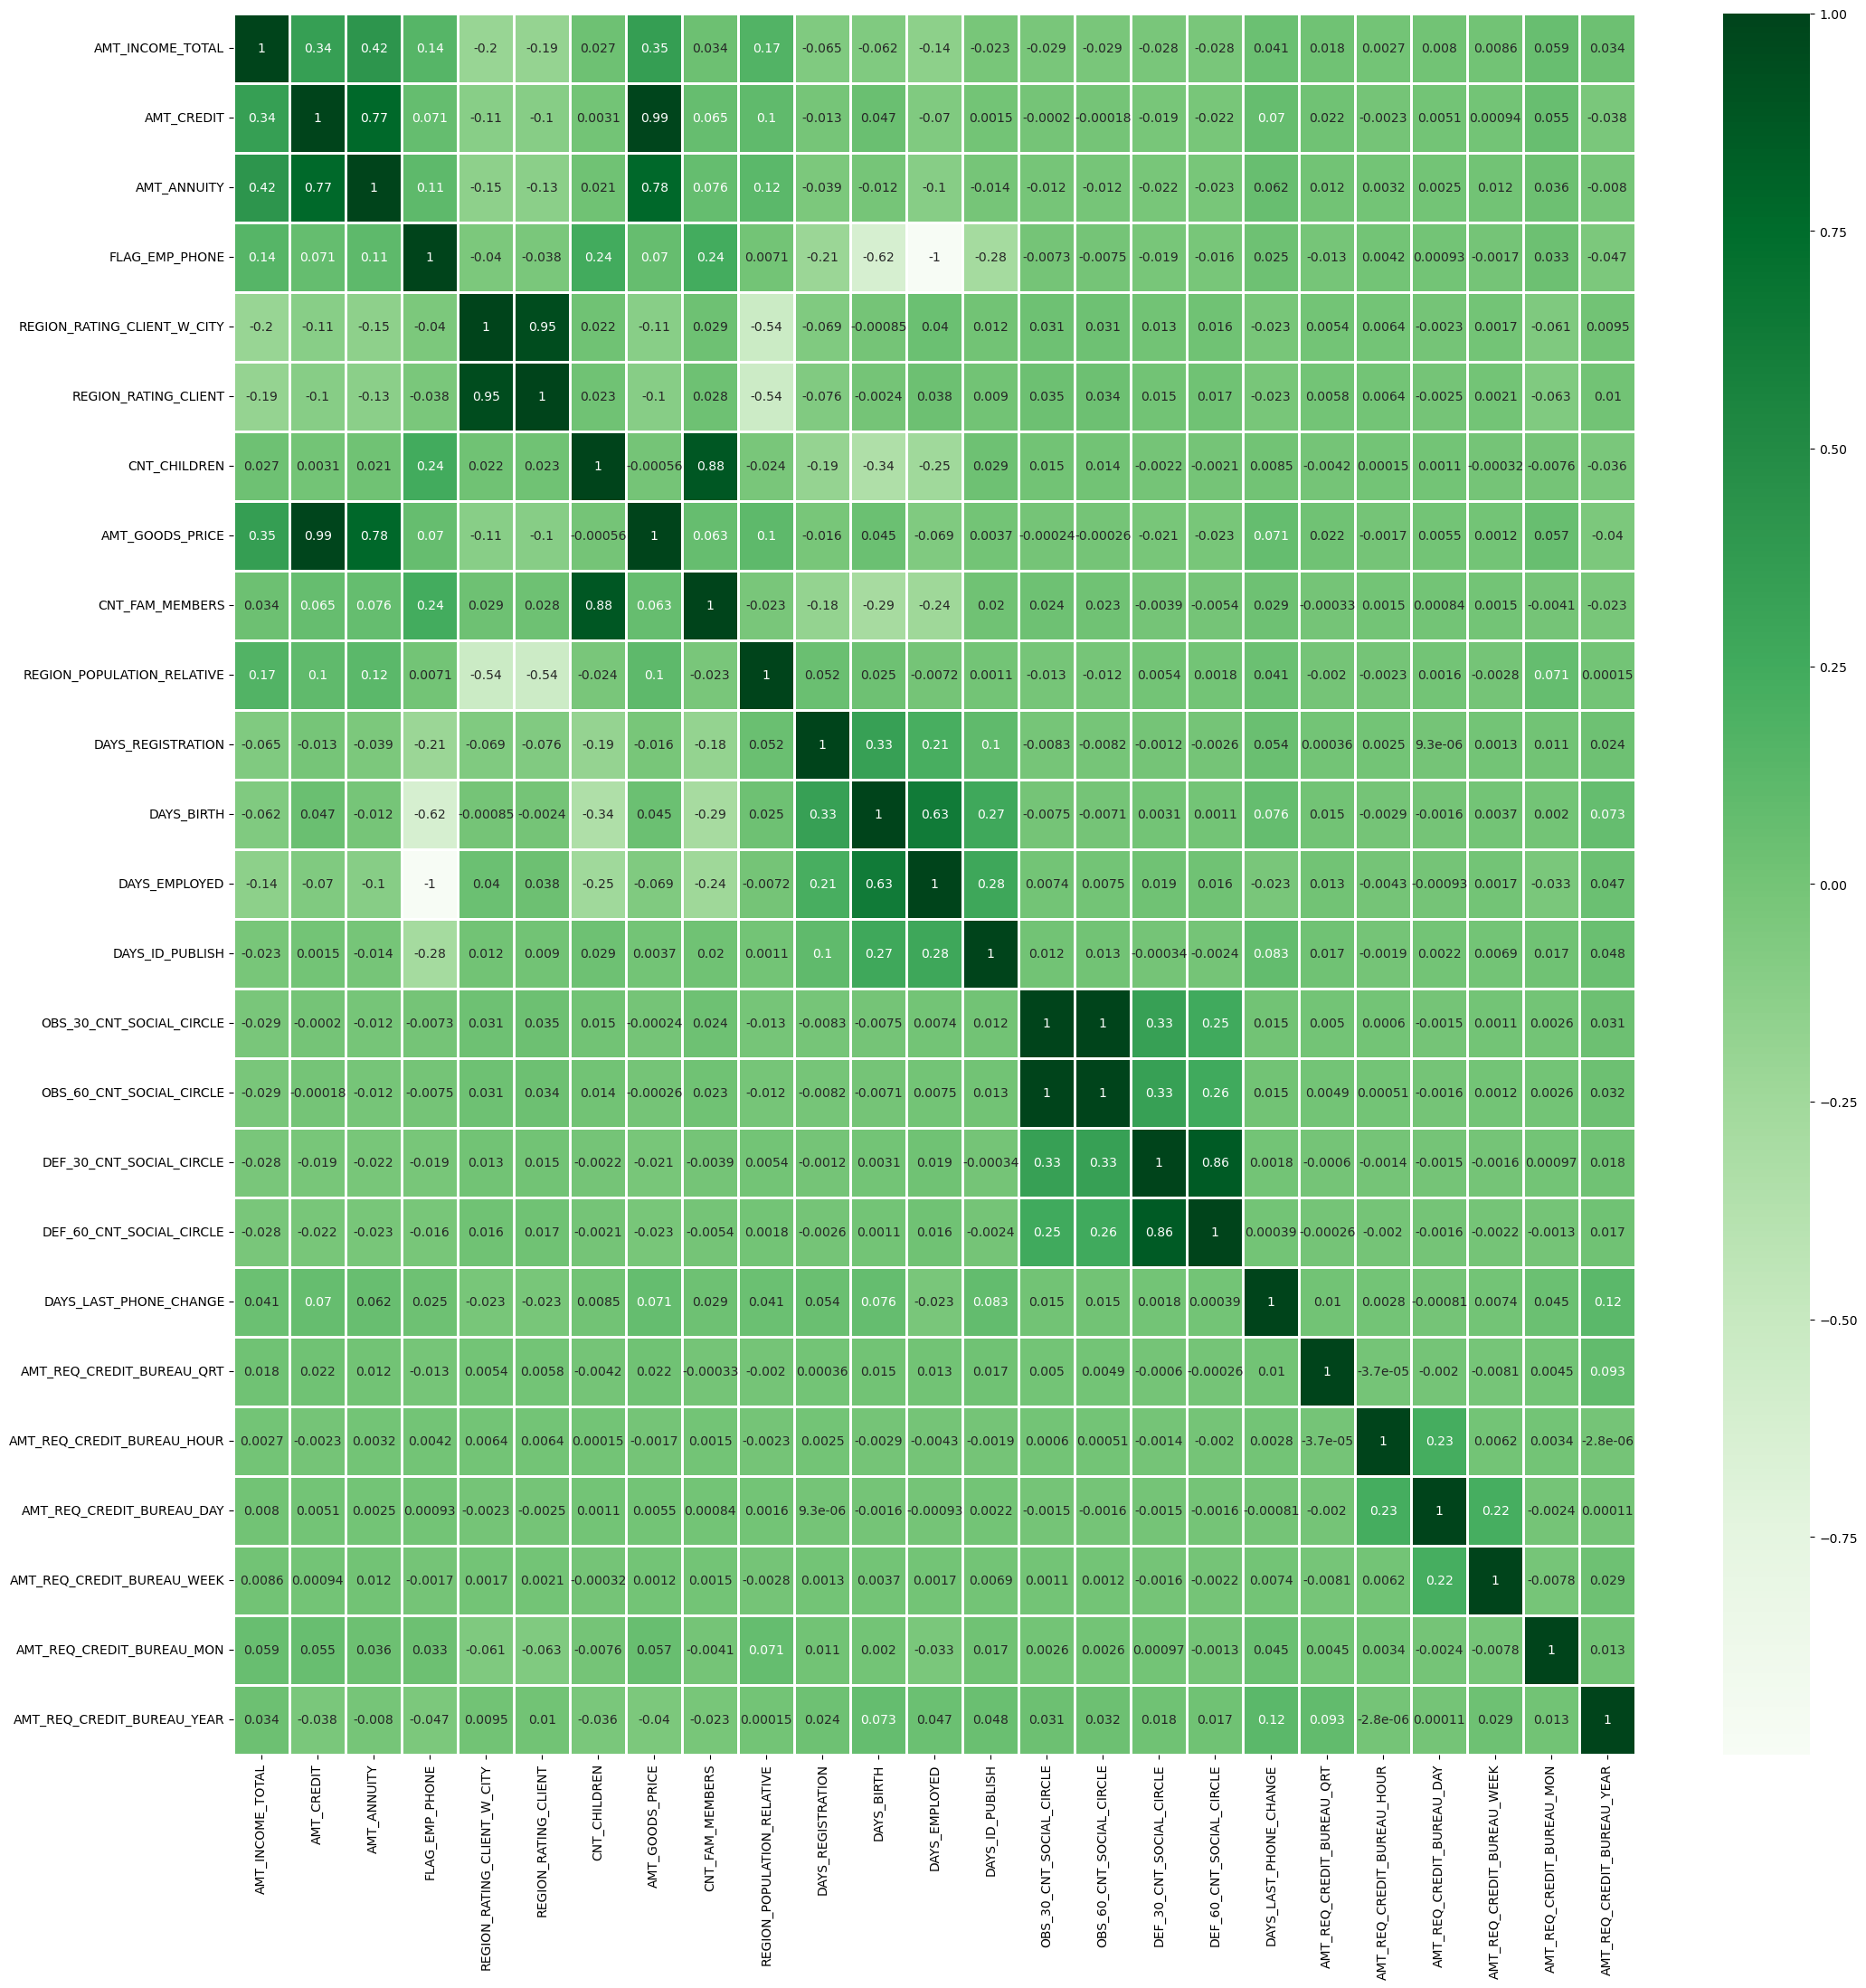

In [96]:
# correlation heatmap
plt.figure(figsize=[25,25])
sns.heatmap(cor0, annot=True, cmap='Greens',linewidths=1)
plt.show()

In [97]:
# Creatind dataframe from correlation matrix and finding top 10 correlation
cor0 = cor0.where(np.triu(np.ones(cor0.shape), k=1).astype(np.bool))
rep_cor = cor0.unstack().reset_index()
rep_cor.columns = ['Variable-1','Variable-2', 'Correlation']
rep_cor.dropna(axis = 0, how = 'any', inplace=True)
rep_cor['Correlation'] = round(rep_cor['Correlation'], 2)
rep_cor['Correlation'] = rep_cor['Correlation'].apply(lambda x: abs(x))
rep_cor.sort_values(by = 'Correlation', ascending = False, inplace= True)
rep_cor.head(10)

,Variable-1,Variable-2,Correlation
389,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
303,DAYS_EMPLOYED,FLAG_EMP_PHONE,1.00
176,AMT_GOODS_PRICE,AMT_CREDIT,0.99
129,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.95
206,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
441,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
177,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
51,AMT_ANNUITY,AMT_CREDIT,0.77
311,DAYS_EMPLOYED,DAYS_BIRTH,0.63
278,DAYS_BIRTH,FLAG_EMP_PHONE,0.62


##### Result - Obs count social circle 30 and 60 are highly correlated follwed by Days Employed and Emp Phone.

## Previous Application

### 1. Loading Data in Notebook and Discovering Data

In [98]:
pre_df = pd.read_csv('previous_application.csv')
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#Checking shape of previous application data
pre_df.shape

(1670214, 37)

In [100]:
# Checking pre_df statistical summary
pre_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [101]:
# Checking pre_df info
pre_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### 2. Missing and Null Values

In [102]:
# Finding null and missing values and assigning it to new varibale.
pre_nulls_cols = 100*pre_df.isnull().mean()

In [103]:
pre_nulls_cols = pre_nulls_cols[pre_nulls_cols>0]
pre_nulls_cols

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [104]:
drop_pre_cols = list(pre_nulls_cols[pre_nulls_cols>40].index)
drop_pre_cols

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [105]:
len(drop_pre_cols)

11

As we can see there are 11 columns which have missing values more than 40%. We will drop these columns from our dataframe.

In [106]:
#Dropping columns
pre_df.drop(labels = drop_pre_cols, axis=1,inplace=True)

In [107]:
# Checking shape after droping columns
pre_df.shape

(1670214, 26)

### 3. Imputing Null Values and Fixing Invalid Columns

#### 3.1 AMT_ANNUITY

In [108]:
pre_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [109]:
pre_df['AMT_ANNUITY'].quantile([0.25,0.50,0.75,1.0])

0.25      6321.780
0.50     11250.000
0.75     20658.420
1.00    418058.145
Name: AMT_ANNUITY, dtype: float64

We will impute with median as there is outlier.

In [110]:
pre_df['AMT_ANNUITY'] = pre_df['AMT_ANNUITY'].fillna(pre_df['AMT_ANNUITY'].median())

#### 3.2 AMT_GOODS_PRICE

In [111]:
pre_df['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [112]:
# Checkink quantiles
pre_df['AMT_GOODS_PRICE'].quantile([0.25,0.50,0.75,1.0])

0.25      50841.0
0.50     112320.0
0.75     234000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

In [113]:
# Imputing with median
pre_df['AMT_GOODS_PRICE'] = pre_df['AMT_GOODS_PRICE'].fillna(pre_df['AMT_GOODS_PRICE'].median())

#### 3.3 CNT_PAYMENT

In [114]:
pre_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [115]:
pre_df['CNT_PAYMENT'].quantile([0.25,0.50,0.75,1.0])

0.25     6.0
0.50    12.0
0.75    24.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [116]:
pre_df['CNT_PAYMENT'] = pre_df['CNT_PAYMENT'].fillna(pre_df['CNT_PAYMENT'].median())

#### 3.4 DAYS_DECISION

Values in DAYS_DECISION are in -ve. Converting them to +ve.

In [117]:
pre_df['DAYS_DECISION'] = pre_df['DAYS_DECISION'].apply(lambda x : abs(x))

### 4. Aanlysing

#### 4.1 NAME_CONTRACT_TYPE

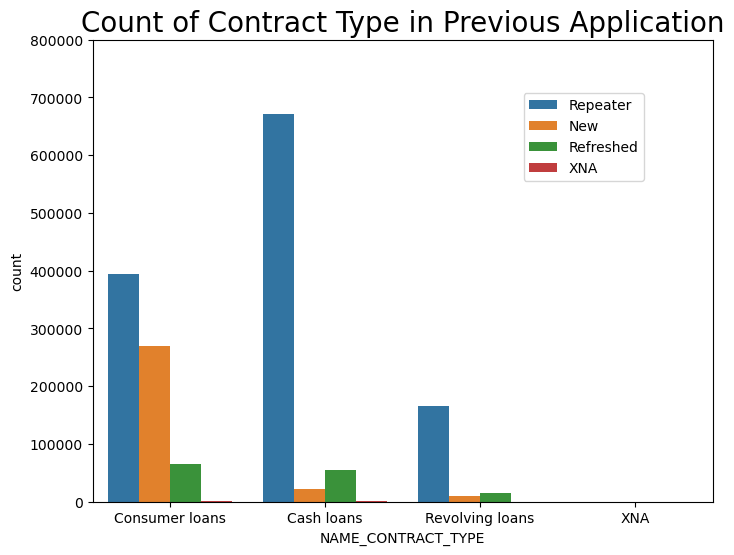

In [118]:
plt.figure(figsize=[8,6])
sns.countplot(pre_df['NAME_CONTRACT_TYPE'], hue = pre_df['NAME_CLIENT_TYPE'])
plt.title('Count of Contract Type in Previous Application')
plt.legend(bbox_to_anchor=(0.9,0.9))
plt.ylim(0,800000)
plt.show()

##### Result - People re-applied for cash loans more.

#### 4.2 NAME_CLIENT_TYPE

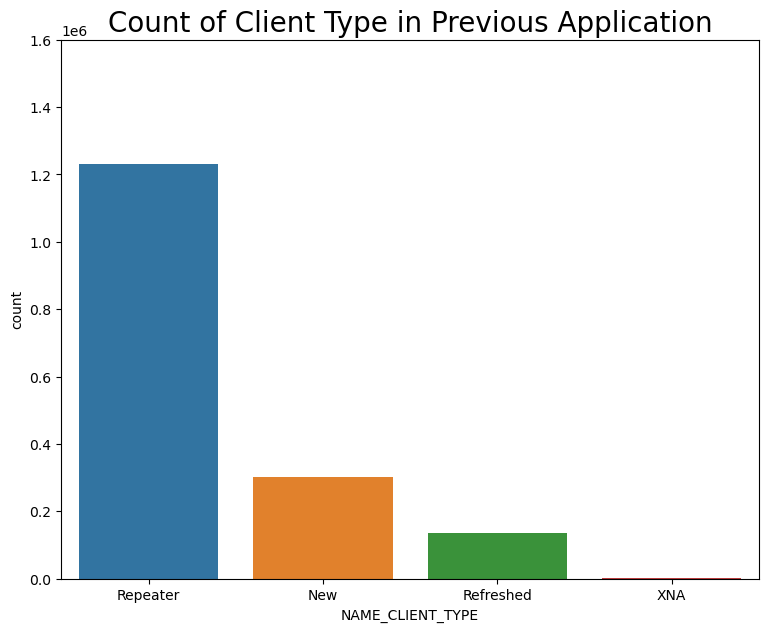

In [119]:
plt.figure(figsize=[9,7])
sns.countplot(pre_df['NAME_CLIENT_TYPE'])
plt.title('Count of Client Type in Previous Application')
plt.ylim(0,1600000)
plt.show()

##### Result - Existing clients have the highest numbers of application.

#### 4.3 NAME_PORTFOLIO

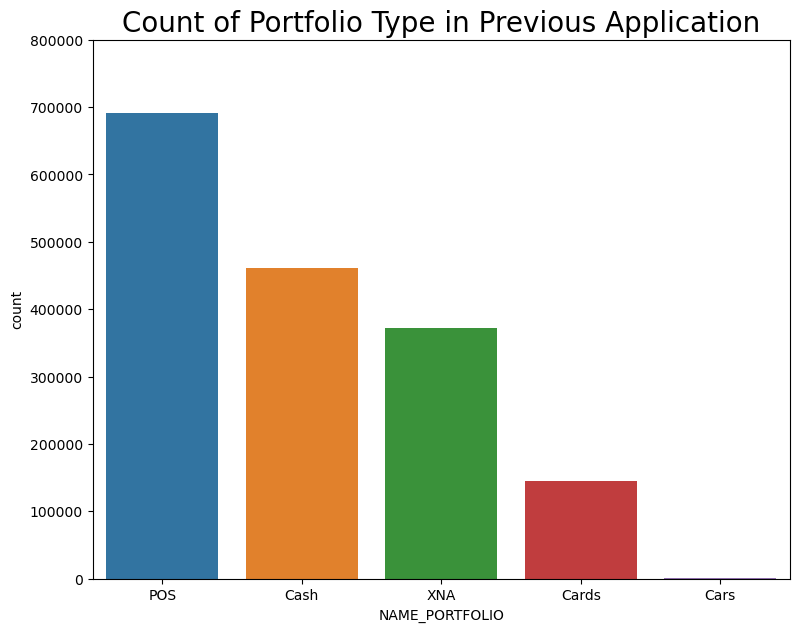

In [120]:
plt.figure(figsize=[9,7])
sns.countplot(pre_df['NAME_PORTFOLIO'])
plt.title('Count of Portfolio Type in Previous Application')
plt.ylim(0,800000)
plt.show()

##### Result - Application for Pos and cash are highest

#### 4.4 PRODUCT_COMBINATION

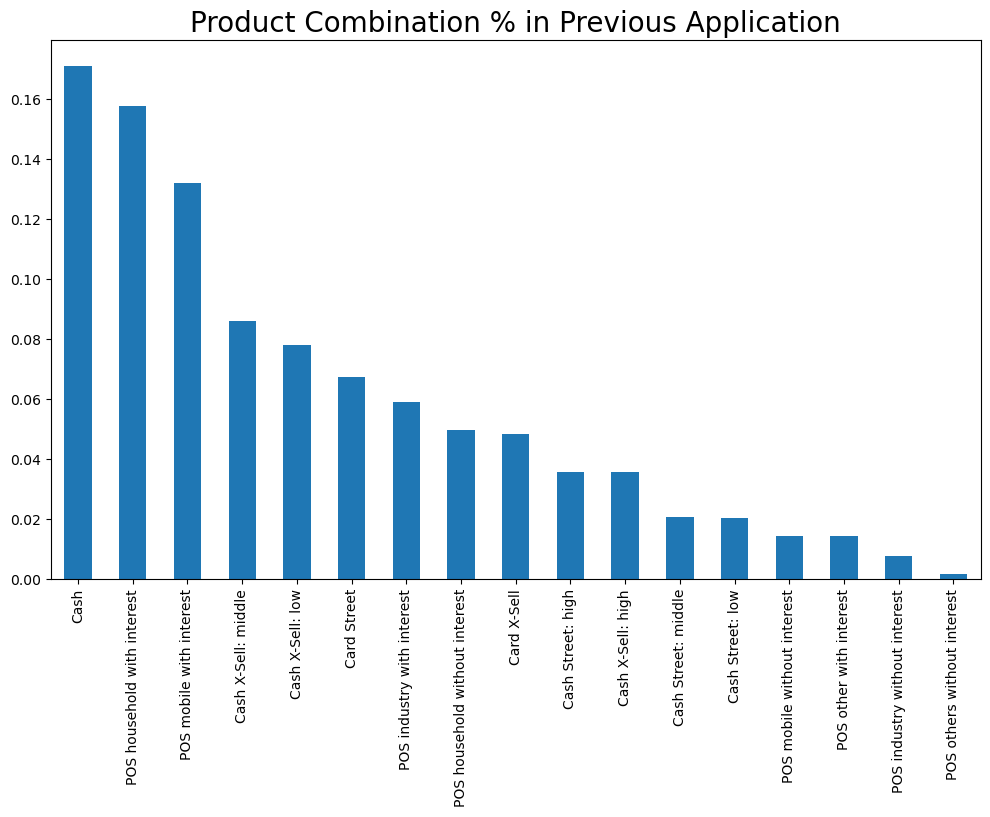

In [121]:
plt.figure(figsize=[12,7])
pre_df['PRODUCT_COMBINATION'].value_counts(normalize=True).plot.bar()
plt.title('Product Combination % in Previous Application')
plt.xticks(rotation=90)
#plt.ylim(0,0.10)
plt.show()

##### Result - Cash, POS household with interest, POS mobile with interest are top 3 products.

### Merging app_df and pre_df

In [122]:
# Merging both data frame
merged_data = pd.merge(app_df, pre_df, how = 'inner' , on = 'SK_ID_CURR')

In [123]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYMENT_GROUP,CREDIT_SLABS,INCOME_RANGE,GOODS_PRICE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1.745205,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<30,0-5,2.5L-5L,Medium,2L-4L,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,12.5L+,Medium,10L-12L,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,12.5L+,Medium,10L-12L,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3.254795,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,0-5,12.5L+,Medium,10L-12L,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cas

In [124]:
# Checking shape
merged_data.shape

(1413701, 103)

### 1. Univariate Analysis on Merged Data

#### 1.1 NAME_GOODS_CATEGORY

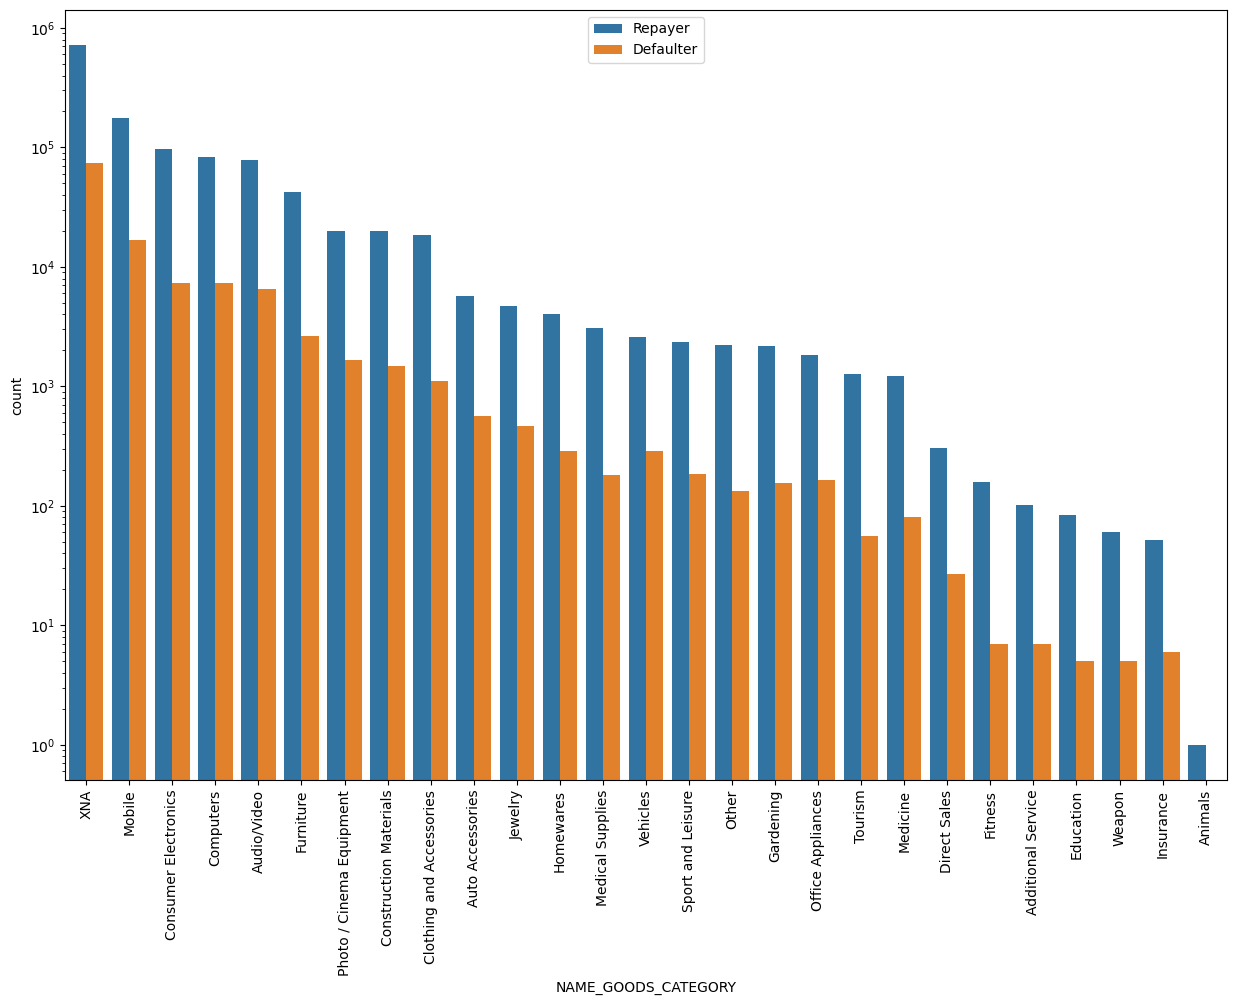

In [125]:
order = merged_data['NAME_GOODS_CATEGORY'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=[15,10])
sns.countplot(merged_data['NAME_GOODS_CATEGORY'], hue=merged_data['TARGET'], order = order)
plt.yscale('log')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation = 90)
plt.show()

##### Result - People are taking consumer loans more for buying electronics products.

#### 1.2 NAME_CASH_LOAN_PURPOSE

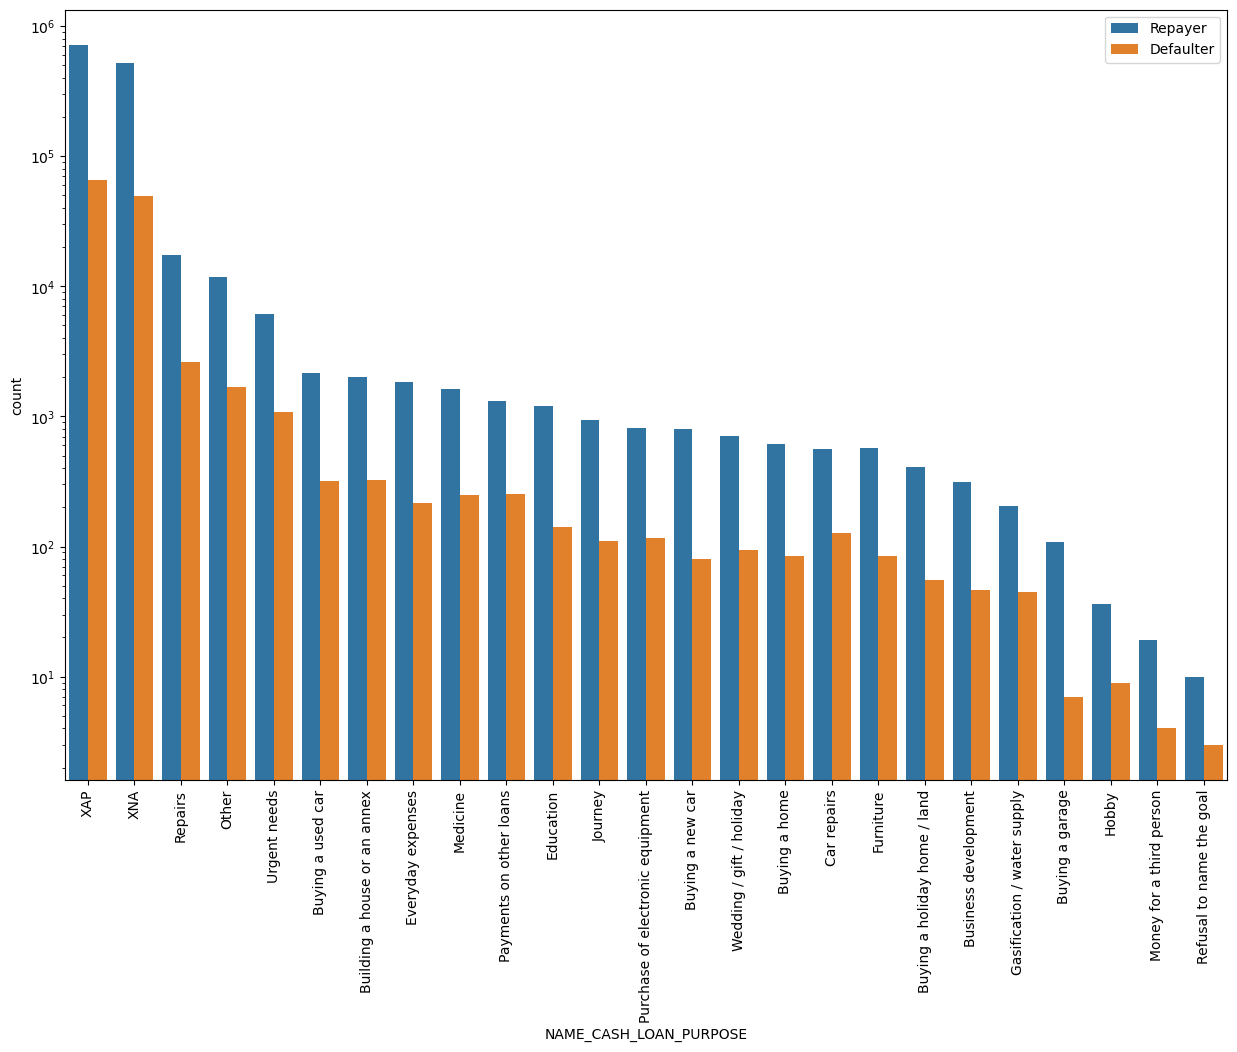

In [126]:
order = merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=[15,10])
sns.countplot(merged_data['NAME_CASH_LOAN_PURPOSE'], hue=merged_data['TARGET'], order = order)
plt.yscale('log')
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation = 90)
plt.show()

##### Result - People are taking cash loan for buying property, buying or repairing car, education and for medical purpose.

#### 1.3 NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS

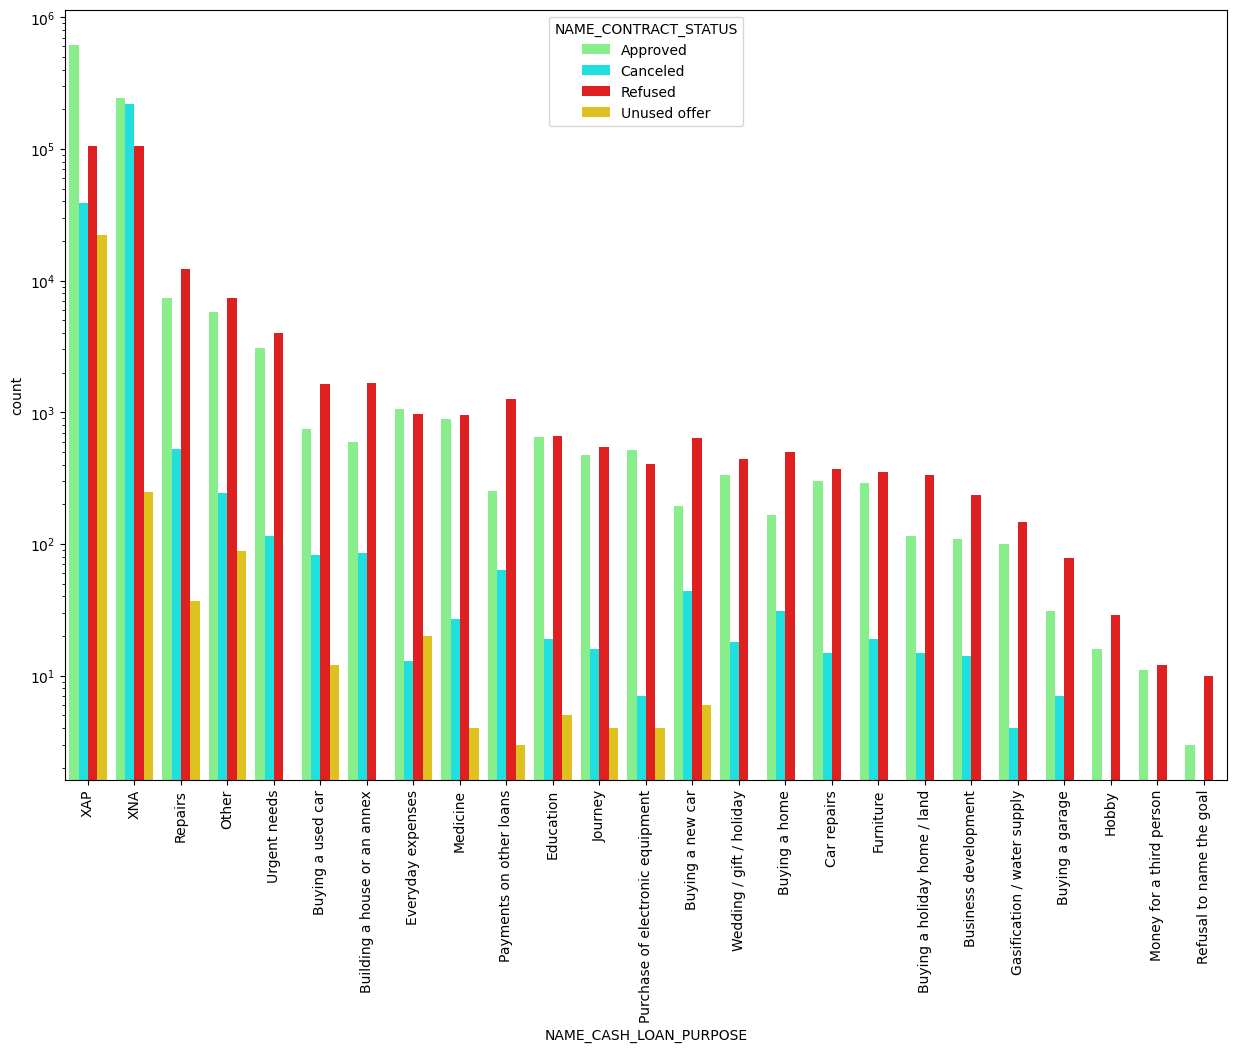

In [127]:
order = merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=[15,10])
sns.countplot(merged_data['NAME_CASH_LOAN_PURPOSE'], hue=merged_data['NAME_CONTRACT_STATUS'], order = order, palette=['#76FF7B','#00FFFF','#FF0000','#FFD700'])
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

#### 1.4 NAME_GOODS_CATEGORY vs NAME_CONTRACT_STATUS

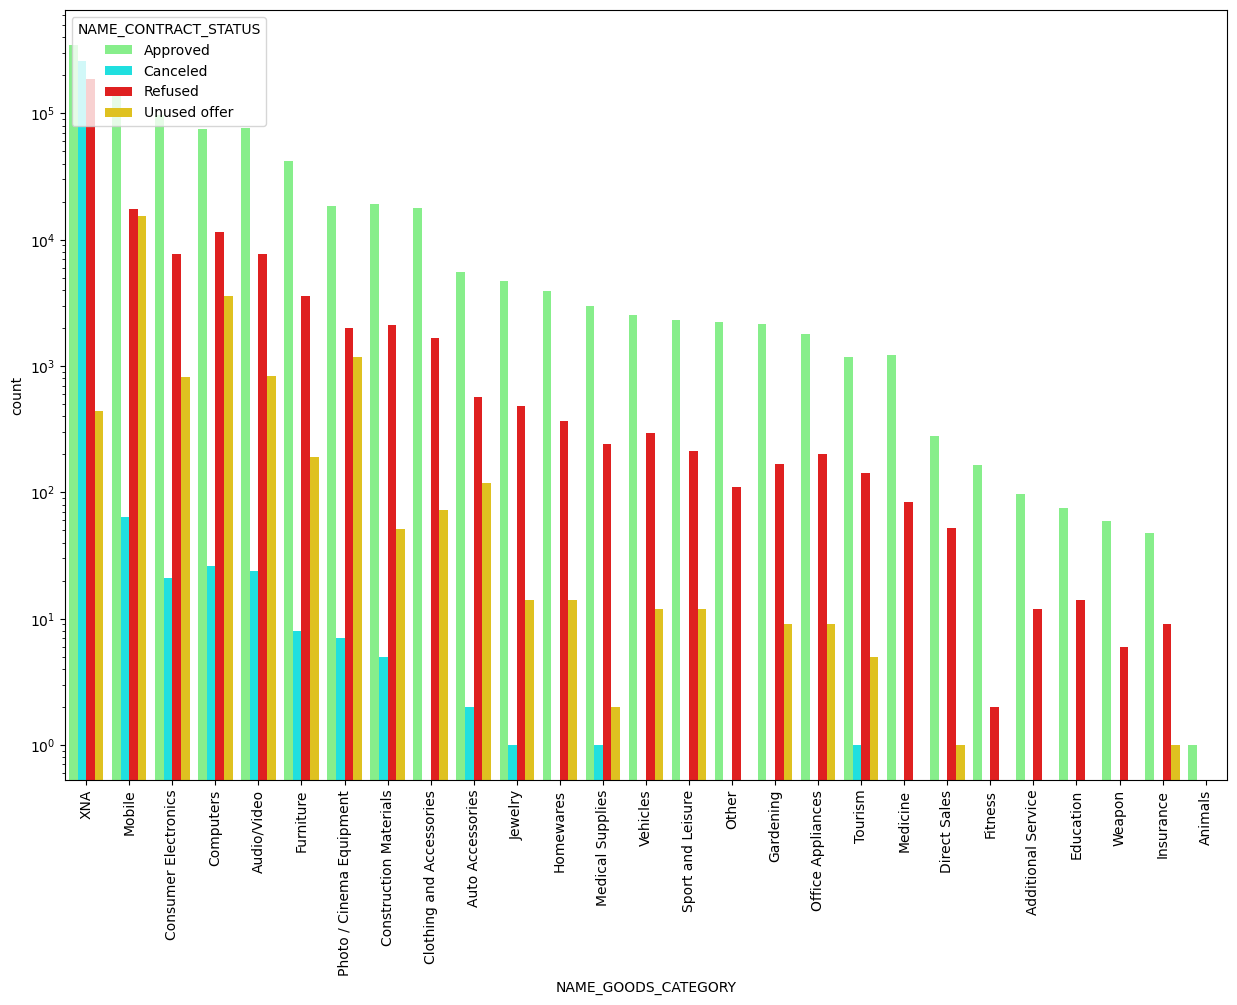

In [128]:
order = merged_data['NAME_GOODS_CATEGORY'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=[15,10])
sns.countplot(merged_data['NAME_GOODS_CATEGORY'], hue=merged_data['NAME_CONTRACT_STATUS'], order = order, palette=['#76FF7B','#00FFFF','#FF0000','#FFD700'])
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

##### Result - For cash loan number of rejected cases are high. For consumer loan approved cases numbers are high.

## Conclusion

1. People are taking cash loan for buying property, buying or repairing car, education and for medical purpose.


2. People are taking consumer loans more for buying electronics products.


3. People with higher education and good income should be classified as priority customer. These people are paying loan on          time.


4. People with more professional experience are paying loan on time. People with work experience 0-5 years have high chances of    making payment defaults.


5. People with lower education and low income are under high risk category.


6. Bank should be careful while giving loan to single/unmarried people.

## Suggestions

*  Bank should reduce the loan amount or lend loan at higher interest rate to people with lower education and lower income to      minimize the risk.
*  Bank can run promotion campaign for consumer loans as approval rates are higher than cash loans.